# ✈️ Understanding Flight Delays: A Data-Driven Approach to Smarter Skies

## 📖 Background  
Flight delays are a major challenge in the aviation industry, impacting millions of passengers and costing airlines billions each year in operational inefficiencies, rebooking, and compensation. Whether due to weather, congestion, or scheduling bottlenecks, delays disrupt not only flight operations but also the passenger experience.

As part of the data analytics team at a major U.S. airline, this project takes a deep dive into historical flight records to uncover the key patterns and predictors of delays. The goal is to enable smarter decision-making through both diagnostic and predictive insights that drive punctuality, improve resource planning, and reduce uncertainty in airline operations.


## ❓ Key Questions

1. **Airline-Level Performance**  
   - How do different airlines compare in terms of departure and arrival delays?  
   - Are some carriers consistently more punctual than others?

2. **Time Patterns**  
   - Are there specific months, days, or hours when delays are more common?  
   - Can we link these trends to operational or external factors?

3. **Airport Reliability**  
   - Which airports experience the most delays?  
   - Do airport location, traffic volume, or route combinations affect delay frequency?

4. **Multi-Output Classification**  
   - Can we **predict both** departure and arrival delays over 15 minutes?  
   - How often do these delays occur together?

5. **Feature Importance**  
   - What features (e.g., distance, time of day, carrier) influence delays the most?  
   - Which combinations of variables are most predictive of delay risk?



## 🎯 Project Goals

### 🔧 Business Goals
- Reduce the negative impact of delays on customer satisfaction and operational costs.  
- Inform scheduling and route planning strategies with data-backed insights.  
- Prioritize interventions at high-risk airports or routes to improve on-time performance.  
- Enhance the passenger experience by minimizing disruption risks.

### 📊 Data Science Goals
- Explore and visualize delay patterns across multiple dimensions: airline, time, and location.  
- Develop a **multi-output classification model** to predict significant departure and arrival delays (15+ minutes).  
- Identify the most influential predictors of flight delays using feature importance techniques.  
- Evaluate model performance to ensure reliable forecasting that can support real-world airline decisions.



## 🧰 Tools and Skills

- **Python & Pandas** for data manipulation  
- **Matplotlib & Seaborn** for visual analysis  
- **Scikit-learn** for classification modeling and feature analysis  
- **Multi-output classification** techniques  
- **Data preprocessing & label engineering**  
- **Exploratory data analysis (EDA)**  
- **Business-focused storytelling with data**


Ready for takeoff? Let’s dive into the data and uncover what’s really driving flight delays.

## 💾 The data ([source](https://www.kaggle.com/datasets/mahoora00135/flights/data)):

**flights.csv**
- `id` - Id number of the flight
- `year` - Year of Flight
- `month` - Month of Flight
- `day` - Day of Month
- `dep_time` - Time of departure (24h format)
- `sched_dep_time` - Scheduled departure time
- `dep_delay` - Delay in departure (minutes)
- `arr_time` - Time of arrival (24h format)
- `sched_arr_time` - Scheduled arrival time
- `arr_delay` - Delay in arrival (minutes)
- `carrier` - Airline company code  
- `flight` - Flight number
- `tailnum`- Aircraft identifier number
- `origin` - Origin Airport - 3 letter code
- `dest` - Destination Airport - 3 letter code
- `air_time` - Duration of the flight (minutes)
- `distance` - Flight distance (miles)
- `hour` - Hour component of scheduled departure time
- `minute` - Minute component of scheduled departure time

**airlines_carrier_codes.csv**
- `Carrier Code` - Airline company code
- `Airline Name` - Airline Name


# Importing libraries and lodaing the dataset

In [1]:
# Data wrangling and visualizations
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px
import plotly.graph_objects as go

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (OneHotEncoder, PowerTransformer,
FunctionTransformer, MinMaxScaler)
from sklearn.model_selection import train_test_split

# Modeling, Evaluation and Hyperparameter tuning
from sklearn.metrics import (f1_score, recall_score, precision_score,
                             hamming_loss, accuracy_score, confusion_matrix,
                             roc_curve, auc, precision_recall_curve,
                             classification_report, average_precision_score,
                             average_precision_score, make_scorer)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Handling class imbalance
from sklearn.utils import resample

# Misc
import matplotlib.font_manager as fm
import matplotlib as mpl

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset
flight_data = pd.read_csv('/content/drive/MyDrive/Project Datasets/flights_data/flights.csv')
airlines_codes = pd.read_csv('/content/drive/MyDrive/Project Datasets/flights_data/airlines_carrier_codes.csv')
flight_data.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
0,0,2023,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15
1,1,2023,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29
2,2,2023,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40
3,3,2023,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45
4,4,2023,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0


In [4]:
airlines_codes.head()

,Carrier Code,Airline Name
0,UA,United Airlines Inc.
1,AA,American Airlines Inc.
2,B6,JetBlue Airways
3,DL,Delta Air Lines Inc.
4,EV,ExpressJet Airlines Inc.


## Customizations

In [5]:
# Customizations
# Set universal font settings
mpl.rcParams['font.family'] = 'Liberation Sans'


# Custom color palette
custom_palette = [
    "#05192d",  # navy
    "#03ef62",  # green
    "#d9d9e2",  # grey400
    "#e8e8ea",  # grey300
    "#333333",  # dark grey
]
sns.set_palette(custom_palette)

# custom font color
font_palette = [
    "#efefef",  #grey200
]

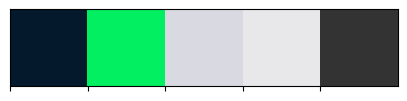

In [6]:
sns.palplot(custom_palette)

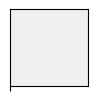

In [7]:
sns.palplot(font_palette)

In [8]:
pd.set_option('display.max_columns', None)

# 🧹 Data Preparation & Cleaning

Effective modeling and analysis start with a well-structured and clean dataset. This section outlines the key data preparation steps taken to ensure the dataset was ready for exploration and modeling.


## 1. 📉 Handling Missing Values

Upon inspecting the dataset, several critical columns—`dep_time`, `arr_time`, `dep_delay`, `arr_delay`, and `air_time`—were found to contain missing values. These values typically occurred together in the same rows, strongly suggesting that these flights were canceled and thus lacked actual recorded times.

Rather than impute or make assumptions about these missing values, I chose to remove the affected rows to keep the analysis focused on completed flights only.

### 🔍 Summary:
| Step                | Count        |
|---------------------|--------------|
| Initial Rows        | 336,776      |
| Final Rows          | 327,346      |
| Rows Removed        | 9,430        |
| % of Data Removed   | 2.8%        |

This approach preserves over 97% of the dataset while ensuring that all analyses and models are based on actual flight activity.


## 2. 🧮 Standardizing Time & Date Features

To make time-related features more intuitive and useful for analysis:

- The `month` column (originally numeric) was mapped to month names: `'Jan'`, `'Feb'`, ..., `'Dec'`.
- A new column, `day_of_week`, was extracted from the existing date columns to reflect the day of the week (e.g., `'Mon'`, `'Tues'`, etc.). This helps identify weekly delay patterns.


## 3. 🏷️ Creating Delay Indicator Features

To support classification and uncover patterns of delay behavior, four binary indicator features were engineered:

| Feature            | Description                                                  |
|--------------------|--------------------------------------------------------------|
| `dep_delayed_15`   | 1 if departure delay > 15 minutes, else 0                    |
| `arr_delayed_15`   | 1 if arrival delay > 15 minutes, else 0                      |
| `dep_delayed`      | 1 if any departure delay (delay > 0), else 0                 |
| `arr_delayed`      | 1 if any arrival delay (delay > 0), else 0                   |

These indicators are especially useful for multi-output classification and evaluating on-time performance thresholds.



## 4. 🗑️ Dropping Irrelevant Features

Several columns were deemed non-essential for analysis or modeling and were removed to simplify the dataset:

- `id`: Row identifier not useful for modeling  
- `tailnum`: Aircraft ID, too granular  
- `year`: Constant value (same for all flights)  
- Other low-value features for the scope of this analysis


These data preparation steps ensure a clean, intuitive, and model-ready dataset that supports both exploratory and predictive workflows.

## Merging Datasets

In [9]:
# Merging airline names into flights data
flights_df = flight_data.merge(airlines_codes, left_on='carrier', right_on='Carrier Code', how='left')

In [10]:
# Drop the duplicate code column
flights_df = flights_df.drop(columns='Carrier Code')

In [11]:
# Data Structure
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

## Missing Values

In [12]:
# Missing values
flights_df.isna().sum().sort_values(ascending=False)

,0
air_time,9430
arr_delay,9430
arr_time,8713
dep_delay,8255
dep_time,8255
tailnum,2512
year,0
id,0
day,0
month,0


In [13]:
flights_df[flights_df['air_time'].isna()].sample(10)

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,Airline Name
271102,271102,2023,7,22,NaN,1855,NaN,NaN,2059,NaN,US,1473,NaN,LGA,CLT,NaN,544,18,55,US Airways Inc.
287574,287574,2023,8,8,NaN,1321,NaN,NaN,1515,NaN,EV,4100,N16981,EWR,MEM,NaN,946,13,21,ExpressJet Airlines Inc.
224853,224853,2023,6,3,NaN,600,NaN,NaN,755,NaN,EV,5592,N754EV,LGA,MEM,NaN,963,6,0,ExpressJet Airlines Inc.
244304,244304,2023,6,24,1519.0,1443,36.0,NaN,1712,NaN,EV,4152,N14188,EWR,ATL,NaN,746,14,43,ExpressJet Airlines Inc.
259128,259128,2023,7,10,1331.0,1330,1.0,1904.0,1638,NaN,B6,431,N665JB,LGA,SRQ,NaN,1047,13,30,JetBlue Airways
311802,311802,2023,9,3,NaN,655,NaN,NaN,840,NaN,MQ,3599,N506MQ,LGA,MSP,NaN,1020,6,55,Envoy Air
270798,270798,2023,7,22,1754.0,1800,-6.0,NaN,1913,NaN,US,2138,N967UW,LGA,BOS,NaN,184,18,0,US Airways Inc.
198110,198110,2023,5,6,726.0,725,1.0,1022.0,1015,NaN,AS,21,N407AS,EWR,SEA,NaN,2402,7,25,Alaska Airlines Inc.
234319,234319,2023,6,13,NaN,1301,NaN,NaN,1411,NaN,EV,4129,N11191,EWR,DCA,NaN,199,13,1,ExpressJet Airlines Inc.
118737,118737,2023,2,9,NaN,755,NaN,NaN,1110,NaN,AA,2267,NaN,LGA,MIA,NaN,1096,7,55,American Airlines Inc.


<Axes: >

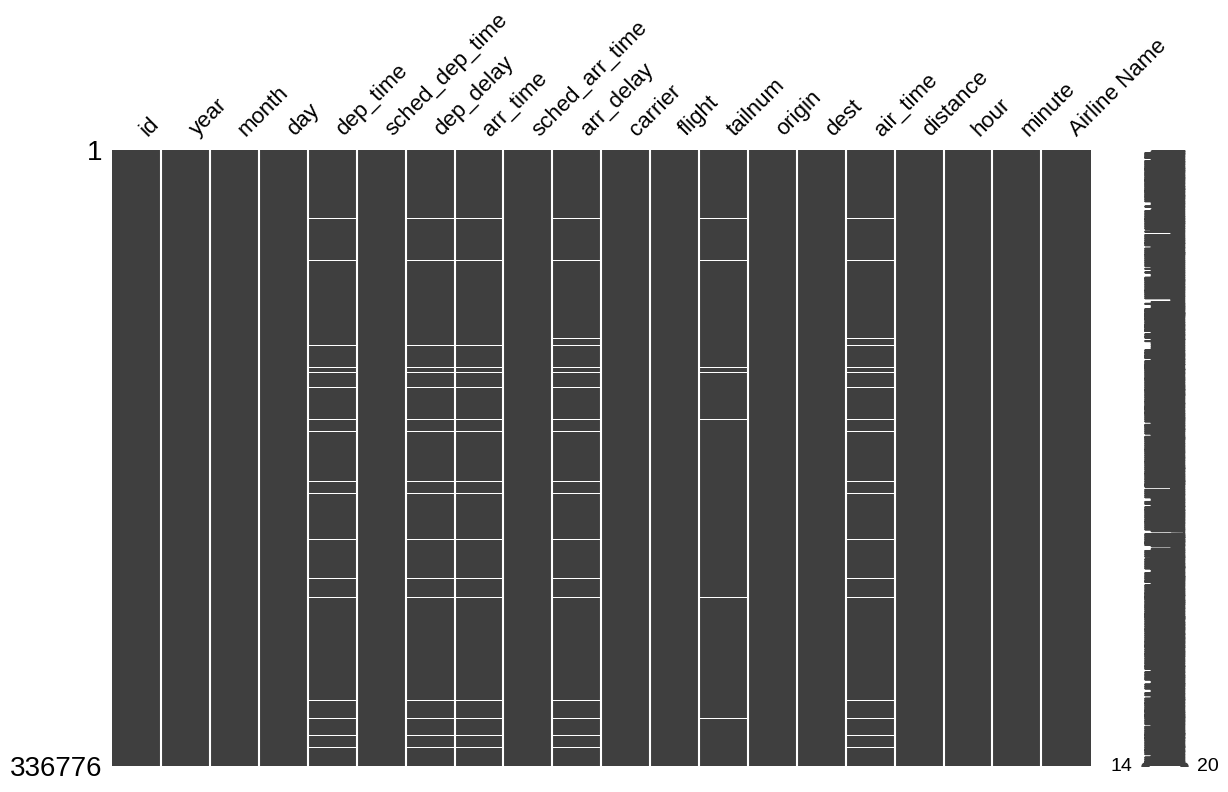

In [14]:
# Visualize missing values as a matrix
msno.matrix(flights_df, figsize=(14, 8))

<Axes: >

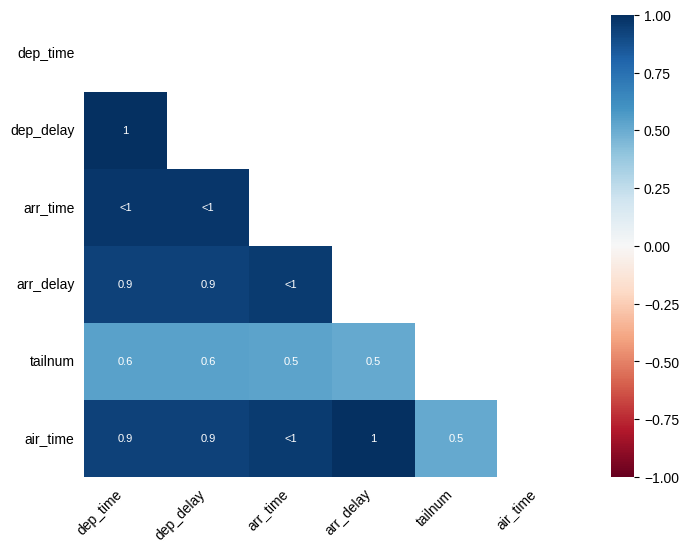

In [15]:
# Visualize correlations in missingness between columns
msno.heatmap(flights_df, figsize=(8, 6), fontsize=10)

In [16]:
# Dropping rows with missing values
# 1. View original shape
initial_shape = flights_df.shape

# 2. Drop rows with missing values
flights_df.dropna(inplace=True)

# 3. View final shape
final_shape = flights_df.shape

# 4. Compute number and percentage of rows dropped
dropped_rows = initial_shape[0] - final_shape[0]
dropped_percentage = (dropped_rows / initial_shape[0]) * 100

print(f"Initial number of rows: {initial_shape[0]}")
print(f"Final number of rows: {final_shape[0]}")
print(f"Rows dropped: {dropped_rows}")
print(f"Percentage of data removed: {dropped_percentage:.2f}%")

Initial number of rows: 336776
Final number of rows: 327346
Rows dropped: 9430
Percentage of data removed: 2.80%


## Standardization and Formatting

In [17]:
flights_df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [18]:
# Combine year, month, and day into a datetime column
flights_df['date'] = pd.to_datetime(flights_df[['year', 'month', 'day']])

# Create a new column for day of the week
flights_df['day_of_week'] = flights_df['date'].dt.strftime('%a')

# Define natural order
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Convert to categorical type with order
flights_df['day_of_week'] = pd.Categorical(flights_df['day_of_week'],
                                           categories=day_order,
                                           ordered=True)

flights_df.day_of_week.value_counts()

,count
day_of_week,
Sat,49301
Sun,49137
Mon,48632
Wed,48531
Tue,48445
Fri,45506
Thu,37794


In [19]:
flights_df['month'].unique()

array([ 1, 10, 11, 12,  2,  3,  4,  5,  6,  7,  8,  9])

In [20]:
# Mapping month number to names
month_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

flights_df['month'] = pd.Categorical(flights_df['month'],
                                     categories=month_order,
                                     ordered=True)

flights_df['month'] = flights_df['month'].map(month_map)

flights_df.month.value_counts()

,count
month,
Aug,28756
Oct,28618
Jul,28293
May,28128
Mar,27902
Apr,27564
Jun,27075
Dec,27020
Sep,27010


In [21]:
# Renaming "Airline Name" to "airline_name"
flights_df.rename(columns={'Airline Name': 'airline_name'}, inplace=True)

## New Calculated Features

In [22]:
# Defining flags for delays >= 15 minutes
flights_df['dep_delayed_15'] = flights_df['dep_delay'] >= 15
flights_df['arr_delayed_15'] = flights_df['arr_delay'] >= 15

# Map to 0 and 1
flights_df['dep_delayed_15'] = flights_df['dep_delayed_15'].astype(int)
flights_df['arr_delayed_15'] = flights_df['arr_delayed_15'].astype(int)

In [23]:
flights_df[['dep_delayed_15', 'arr_delayed_15']].sample(5)

,dep_delayed_15,arr_delayed_15
327600,0,0
275180,0,0
308209,0,0
304459,0,0
263320,0,0


In [24]:
# Defining flags for flights delayed and not delayed
flights_df['dep_delayed'] = flights_df['dep_delay'] > 0
flights_df['arr_delayed'] = flights_df['arr_delay'] > 0

# Map to 0 and 1
flights_df['dep_delayed'] = flights_df['dep_delayed'].astype(int)
flights_df['arr_delayed'] = flights_df['arr_delayed'].astype(int)

In [25]:
flights_df[['dep_delayed', 'arr_delayed']].sample(5)

,dep_delayed,arr_delayed
95705,1,1
150040,1,1
251481,1,0
318590,1,0
134980,0,0


## Dropping Irrelevant Features

In [26]:
flights_df['flight'].sample(5)

,flight
297758,2331
322171,488
210689,1905
242743,367
36879,1895


In [27]:
cols_to_drop = ['year', 'day', 'dep_time', 'sched_dep_time', 'arr_time',
                'sched_arr_time', 'tailnum', 'carrier', 'id']

flights_df = flights_df.drop(columns=cols_to_drop)

In [28]:
flights_df = flights_df.reset_index(drop=True)

In [29]:
flights_df.head()

,month,dep_delay,arr_delay,flight,origin,dest,air_time,distance,hour,minute,airline_name,date,day_of_week,dep_delayed_15,arr_delayed_15,dep_delayed,arr_delayed
0,Jan,2.0,11.0,1545,EWR,IAH,227.0,1400,5,15,United Airlines Inc.,2023-01-01,Sun,0,0,1,1
1,Jan,4.0,20.0,1714,LGA,IAH,227.0,1416,5,29,United Airlines Inc.,2023-01-01,Sun,0,1,1,1
2,Jan,2.0,33.0,1141,JFK,MIA,160.0,1089,5,40,American Airlines Inc.,2023-01-01,Sun,0,1,1,1
3,Jan,-1.0,-18.0,725,JFK,BQN,183.0,1576,5,45,JetBlue Airways,2023-01-01,Sun,0,0,0,0
4,Jan,-6.0,-25.0,461,LGA,ATL,116.0,762,6,0,Delta Air Lines Inc.,2023-01-01,Sun,0,0,0,0


# 🔍 Exploratory Data Analysis (EDA)




In [30]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327346 entries, 0 to 327345
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   month           327346 non-null  category      
 1   dep_delay       327346 non-null  float64       
 2   arr_delay       327346 non-null  float64       
 3   flight          327346 non-null  int64         
 4   origin          327346 non-null  object        
 5   dest            327346 non-null  object        
 6   air_time        327346 non-null  float64       
 7   distance        327346 non-null  int64         
 8   hour            327346 non-null  int64         
 9   minute          327346 non-null  int64         
 10  airline_name    327346 non-null  object        
 11  date            327346 non-null  datetime64[ns]
 12  day_of_week     327346 non-null  category      
 13  dep_delayed_15  327346 non-null  int64         
 14  arr_delayed_15  327346 non-null  int

## 📄Summary Statistics Overview

The dataset contains 327,346 flight records with complete data across key numerical and categorical variables. The following is a structured interpretation of the summary statistics.


🔢 **Numerical Features**

**Flight Delays**

* **Departure Delays (`dep_delay`)**:

  * The average departure delay is 12.56 minutes but the median is -2 minutes, indicating that more than half of the flights left on time or early.
  * The distribution is right-skewed, with a few extreme outliers (maximum delay of 1301 minutes).
  * 25 of flights departed at least 5 minutes early, while 75 departed with 11 minutes or less delay.

* **Arrival Delays (`arr_delay`)**:

  * The average arrival delay is 6.90 minutes, and the median is -5 minutes, suggesting many flights arrive ahead of schedule or on time.
  * Similar to departure delays, arrival delays show significant variation and are skewed by a few large delay values (up to 1272 minutes).

* **Delay Indicators (`dep_delayed_15`, `arr_delayed_15`)**:

  * Approximately 22–24% of flights were delayed by 15 minutes or more, based on binary indicators.
  * A broader look shows that around 40% of flights experienced any form of delay (`dep_delayed`, `arr_delayed`), suggesting that most delays are minor.

**Flight Characteristics**

* **Air Time and Distance**:

  * Average air time is approximately 151 minutes with flights ranging from 20 to 695 minutes.
  * Distance traveled averages around 1048 miles, with a broad spread from 80 to 4983 miles, indicating a mix of short-haul and long-haul flights.

* **Scheduled Times**:

  * Flights are evenly distributed throughout the day, with an average scheduled hour of 13:14 (1:14 PM) and mean minute value of 26.


🔤 **Categorical Features**

* **Month**:

  * All 12 calendar months are represented.
  * August has the most flights (28,756), possibly indicating peak travel season.

* **Origin Airports (`origin`)**:

  * Flights originated from 3 major airports.
  * EWR (Newark) was the top origin with 117,127 flights, indicating its high volume.

* **Destination Airports (`dest`)**:

  * 104 unique destinations, with Atlanta (ATL) as the most common (16,837 flights).
  * Reflects a broad national network.

* **Airline Names (`airline_name`)**:

  * 16 airlines in total.
  * United Airlines had the highest number of flights (57,782), followed by other major carriers.

* **Day of Week (`day_of_week`)**:

  * Flights are evenly distributed across all 7 days.
  * Saturday is the busiest day with 49,301 flights.



**✅ Key Insights**

* Most flights are on-time or early, despite some large delays.
* Peak traffic occurs in August, on Saturdays, and is heavily centered around EWR.
* The dataset covers a diverse range of destinations, airlines, and flight durations.


In [31]:
num_cols = flights_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = flights_df.select_dtypes(include=['object', 'category']).columns.tolist()

In [32]:
# Summary statistics of num_cols except 'flight'
if 'flight' in num_cols:
    num_cols.remove('flight')

flights_df[num_cols].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
dep_delay,327346.0,12.56,40.07,-43.0,-5.0,-2.0,11.0,1301.0
arr_delay,327346.0,6.90,44.63,-86.0,-17.0,-5.0,14.0,1272.0
air_time,327346.0,150.69,93.69,20.0,82.0,129.0,192.0,695.0
distance,327346.0,1048.37,735.91,80.0,509.0,888.0,1389.0,4983.0
hour,327346.0,13.14,4.66,5.0,9.0,13.0,17.0,23.0
minute,327346.0,26.23,19.30,0.0,8.0,29.0,44.0,59.0
dep_delayed_15,327346.0,0.22,0.42,0.0,0.0,0.0,0.0,1.0
arr_delayed_15,327346.0,0.24,0.43,0.0,0.0,0.0,0.0,1.0
dep_delayed,327346.0,0.39,0.49,0.0,0.0,0.0,1.0,1.0
arr_delayed,327346.0,0.41,0.49,0.0,0.0,0.0,1.0,1.0


In [33]:
flights_df[cat_cols].describe().T

,count,unique,top,freq
month,327346,12,Aug,28756
origin,327346,3,EWR,117127
dest,327346,104,ATL,16837
airline_name,327346,16,United Airlines Inc.,57782
day_of_week,327346,7,Sat,49301


## 📊 Visualizing Distribution

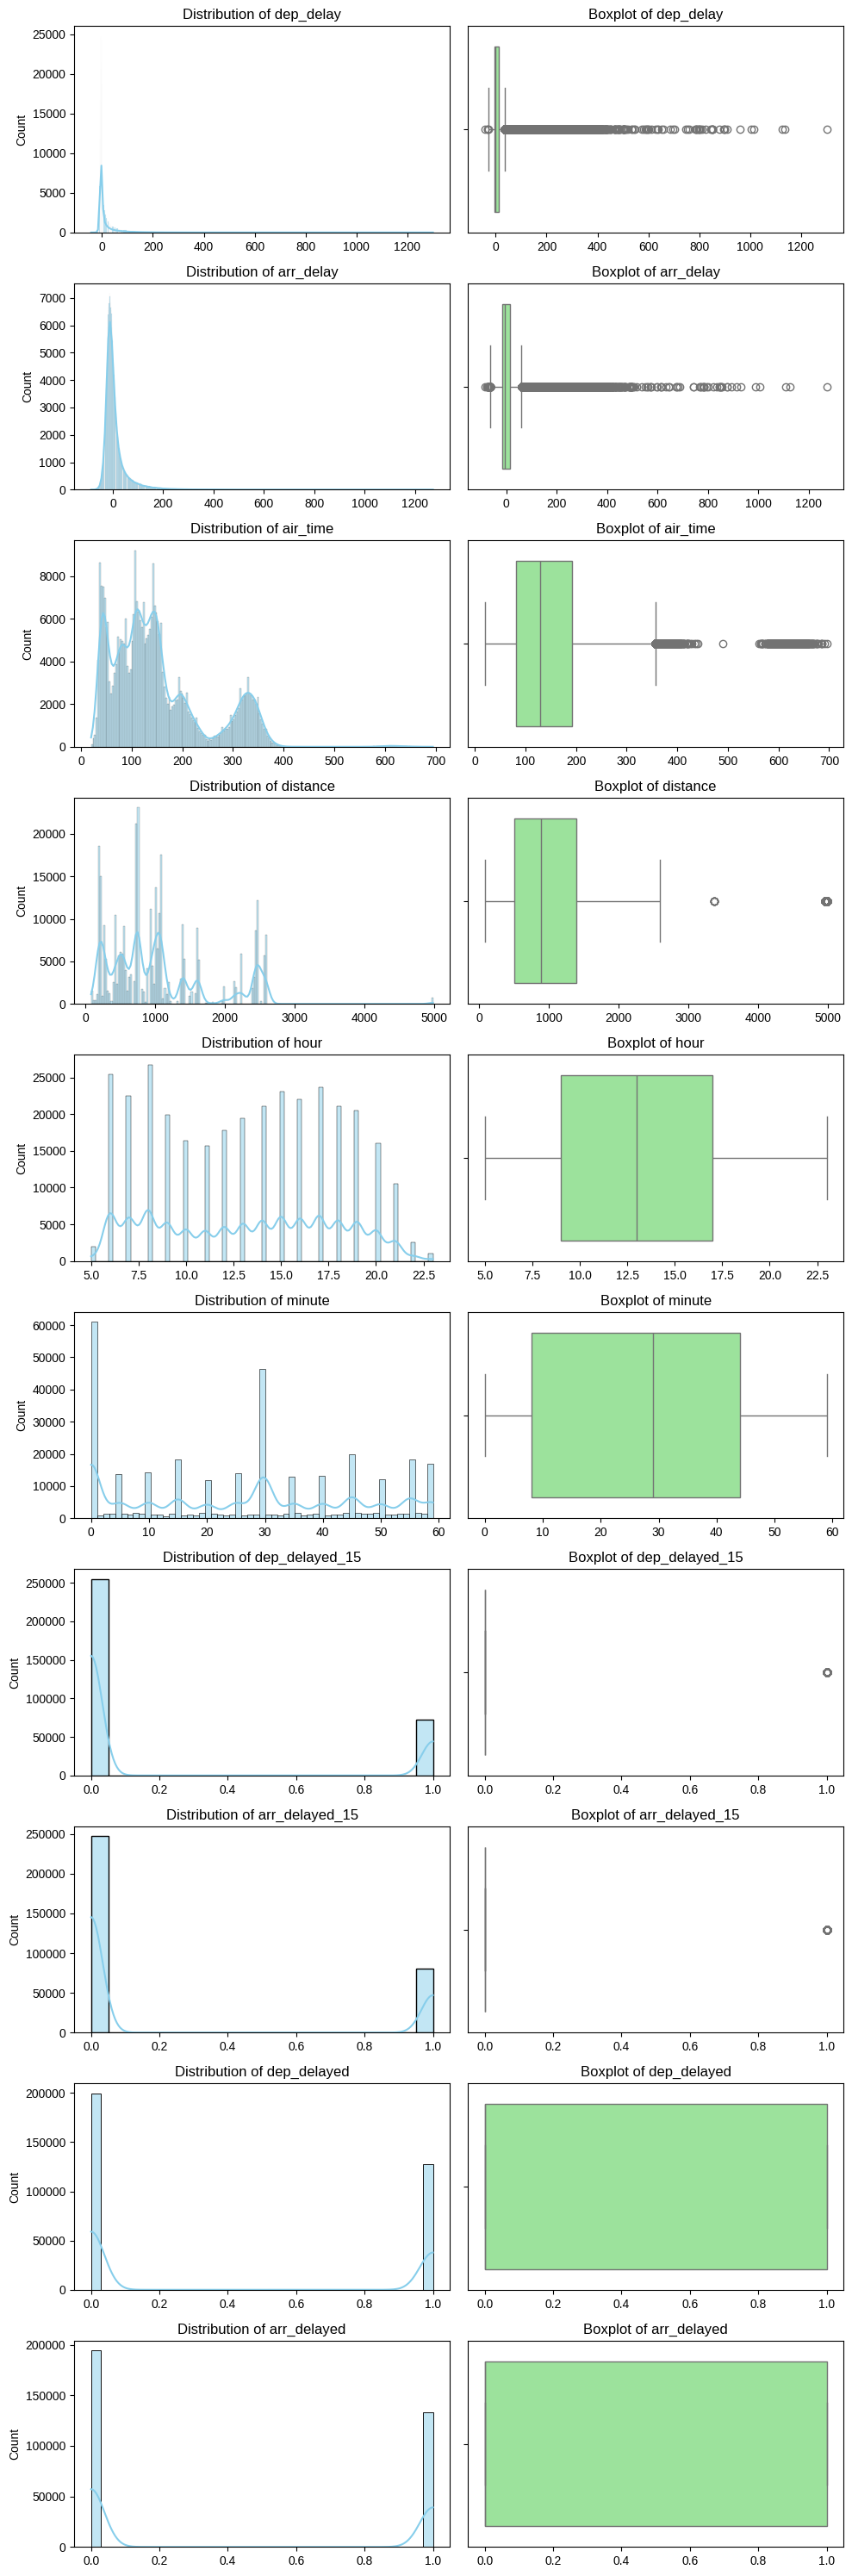

In [34]:
# Histograms and Boxplots of numerical values
fig, axes = plt.subplots(nrows=len(num_cols), ncols=2, figsize=(10, 30))

# plot the histogram on the left side
for i, col in enumerate(num_cols):
    sns.histplot(data=flights_df, x=col, kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Distribution of {col}')
    axes[i, 0].set_xlabel('')

# plot the boxplot on the right side
for i, col in enumerate(num_cols):
    sns.boxplot(data=flights_df, x=col, ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Boxplot of {col}')
    axes[i, 1].set_xlabel('')

plt.tight_layout()
plt.show()

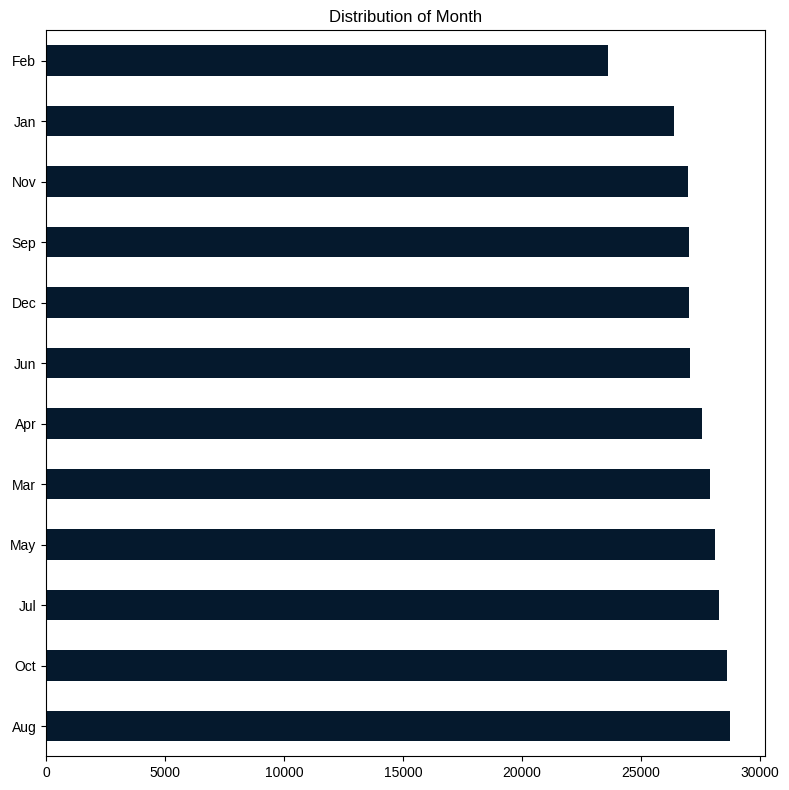

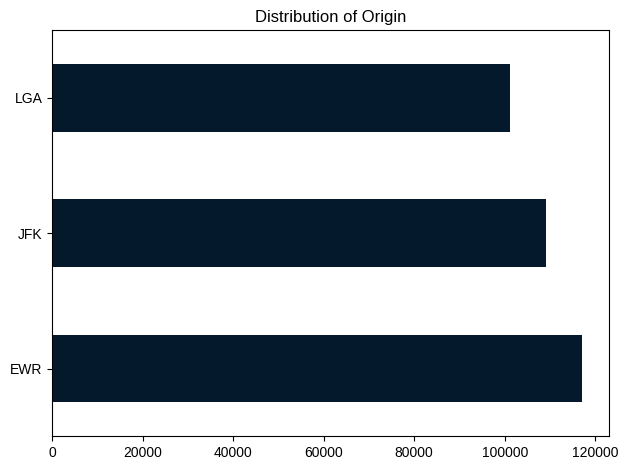

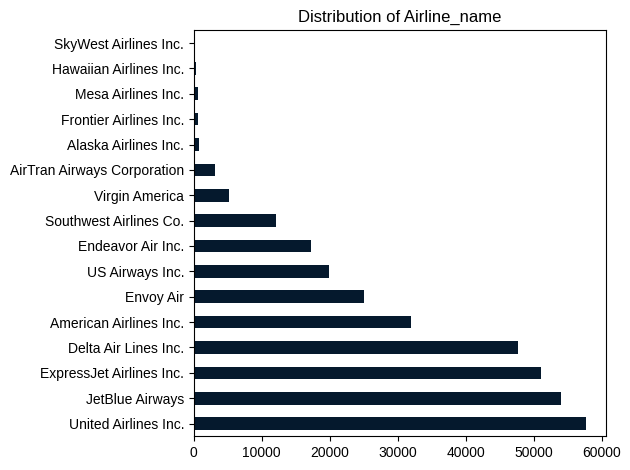

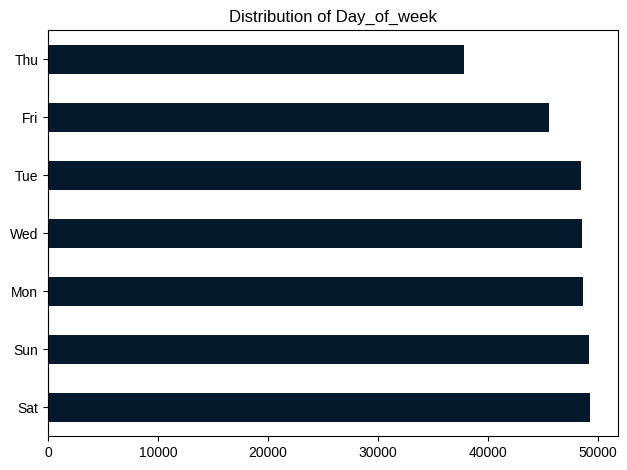

In [35]:
# Barh chart of categorical features - two per row
plt.figure(figsize=(8, 8))

for i, col in enumerate(cat_cols):
    if col != 'dest':
      flights_df[col].value_counts().plot(kind='barh')
      plt.title(f'Distribution of {col.capitalize()}')
      plt.xlabel('')
      plt.ylabel('')
      plt.tight_layout()
      plt.show()

## Overall Delay Distribution

In [36]:
# Visualizing delays
flights_df.dep_delayed.value_counts(normalize=True).round(2)

,proportion
dep_delayed,
0,0.61
1,0.39


In [37]:
flights_df.arr_delayed.value_counts(normalize=True).round(2)

,proportion
arr_delayed,
0,0.59
1,0.41


In [38]:
flights_df.dep_delayed_15.value_counts(normalize=True).round(2)

,proportion
dep_delayed_15,
0,0.78
1,0.22


In [39]:
flights_df.arr_delayed_15.value_counts(normalize=True).round(2)

,proportion
arr_delayed_15,
0,0.76
1,0.24


##❔Exploring Key Trends in Flight Delays

### **1. Airline-Level Performance**

- How do different airlines compare in terms of departure and arrival delays?
- Are some carriers consistently more punctual than others?

---

#### 🚨 Most Delayed Airlines

The following airlines recorded the highest combined delay rates (departure and arrival delays over 15 minutes):

| Airline                     | Departure Delay (%) | Arrival Delay (%) | Total Delay (%) |
|----------------------------|----------------------|--------------------|------------------|
| **Frontier Airlines Inc.** | 29%                  | 39%                | **68%**          |
| **ExpressJet Airlines Inc.** | 31%                | 32%                | **63%**          |
| **AirTran Airways Corp.**  | 26%                  | 36%                | **62%**          |

🔎 These carriers show elevated delays across both departure and arrival segments, suggesting possible system-wide inefficiencies or route-specific challenges


#### ✅ Least Delayed Airlines

The most punctual airlines in the dataset were:

| Airline                     | Departure Delay (%) | Arrival Delay (%) | Total Delay (%) |
|----------------------------|----------------------|--------------------|------------------|
| **Hawaiian Airlines Inc.** | 7%                   | 13%                | **20%**          |
| **Alaska Airlines Inc.**   | 14%                  | 15%                | **29%**          |
| **US Airways Inc.**        | 12%                  | 19%                | **31%**          |

🟢 These airlines maintain consistently low delay rates, which may be attributed to:
- Efficient turnaround operations
- Less congested airport hubs
- Favorable flight routes or schedules


#### 📌 Key Takeaway

There is a significant performance gap between the best- and worst-performing carriers — a 48 percentage point difference between Hawaiian Airlines (20%) and Frontier Airlines (68%).

➡️ This insight emphasizes the importance of analyzing operational practices, route networks, and resource allocation strategies that may influence on-time performance. It can help:
- Passengers make more informed choices
- Airlines prioritize improvements
- Policymakers set benchmarks for reliability

In [40]:
# Prepare the data
airline_delay = flights_df.groupby('airline_name').agg({
    'dep_delayed_15': 'mean',
    'arr_delayed_15': 'mean'
})*100

airline_delay = airline_delay.round(1)

airline_delay = airline_delay.reset_index().rename(columns={
    'airline_name': 'Airline Name',
    'dep_delayed_15': 'Departure Delay ≥15m',
    'arr_delayed_15': 'Arrival Delay ≥15m'
})

# Sort airlines by total delay percentage for better visual order
airline_delay['Total Delay'] = airline_delay['Departure Delay ≥15m'] + airline_delay['Arrival Delay ≥15m']
airline_delay = airline_delay.sort_values('Total Delay', ascending=False)

In [41]:
airline_delay

,Airline Name,Departure Delay ≥15m,Arrival Delay ≥15m,Total Delay
7,Frontier Airlines Inc.,29.5,38.8,68.3
6,ExpressJet Airlines Inc.,31.0,32.1,63.1
0,AirTran Airways Corporation,27.6,34.6,62.2
10,Mesa Airlines Inc.,29.2,32.9,62.1
12,Southwest Airlines Co.,27.7,25.7,53.4
4,Endeavor Air Inc.,26.0,25.6,51.6
9,JetBlue Airways,23.4,27.0,50.4
5,Envoy Air,21.7,27.9,49.6
11,SkyWest Airlines Inc.,20.7,24.1,44.8
14,United Airlines Inc.,21.7,22.5,44.2


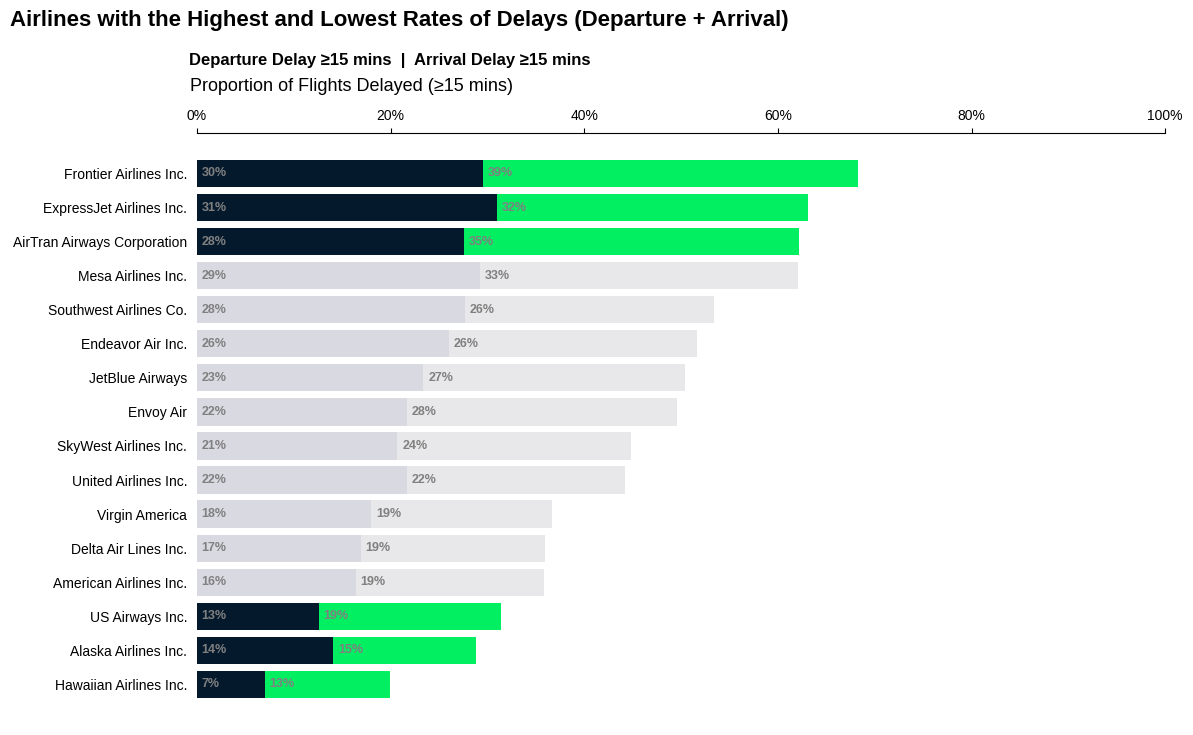

In [42]:
# Visualizing
# Identify top 3 and bottom 3 airlines
top_3 = airline_delay.head(3).index
bottom_3 = airline_delay.tail(3).index

# Assign bar colors
dep_colors = []
arr_colors = []
for i in airline_delay.index:
    if i in top_3 or i in bottom_3:
        dep_colors.append(custom_palette[0])  # navy
        arr_colors.append(custom_palette[1])  # green
    else:
        dep_colors.append(custom_palette[2])  # grey400
        arr_colors.append(custom_palette[3])  # grey100

# Plot
fig, ax = plt.subplots(figsize=(12, 7))

# Plot departure delays
ax.barh(
    airline_delay['Airline Name'],
    airline_delay['Departure Delay ≥15m'],
    color=dep_colors
)

# Plot arrival delays stacked on departure
ax.barh(
    airline_delay['Airline Name'],
    airline_delay['Arrival Delay ≥15m'],
    left=airline_delay['Departure Delay ≥15m'],
    color=arr_colors
)

# Annotate departure and arrival delay percentages
for i in range(len(airline_delay)):
    airline = airline_delay['Airline Name'].iloc[i]
    dep = airline_delay['Departure Delay ≥15m'].iloc[i]
    arr = airline_delay['Arrival Delay ≥15m'].iloc[i]

    y = i

    # Departure delay: aligned left inside its bar
    if dep > 1:
        ax.text(
            0.5, y,  # start near the left of the bar
            f"{dep:.0f}%",
            va='center', ha='left',
            color='grey', fontsize=9, fontweight='bold'
        )

    # Arrival delay: aligned left of the arrival segment (i.e., just after dep)
    if arr > 1:
        ax.text(
            dep + 0.5, y,  # start just after departure bar
            f"{arr:.0f}%",
            va='center', ha='left',
            color='grey', fontsize=9, fontweight='bold'
        )

# Customize axes and layout
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.invert_yaxis()  # longest bar on top

ax.set_xticks(np.arange(0, 101, 20))
ax.set_xlim(0, 100)

ax.tick_params(axis='y', left=False)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.spines[['left', 'right', 'bottom']].set_visible(False)

# Custom legend without color boxes
ax.legend(
    handles=[
        plt.Line2D([0], [0], color='none', label='Departure Delay ≥15 mins  |'),
        plt.Line2D([0], [0], color='none', label='Arrival Delay ≥15 mins')
    ],
    loc='upper center',
    frameon=False,
    ncol=2,
    handlelength=0,
    handletextpad=0.5,
    columnspacing=0.03,
    bbox_to_anchor=(0.195, 1.16),
    prop={'weight': 'bold', 'size': 12}
)

# Texts
fig.text(0.01, 1.02, "Airlines with the Highest and Lowest Rates of Delays (Departure + Arrival)",
         fontsize=16, fontweight='bold')

ax.set_xlabel("Proportion of Flights Delayed (≥15 mins)", fontsize=13)
ax.xaxis.set_label_coords(0.16, 1.07)

ax.set_ylabel("")  # remove y-axis label

plt.tight_layout()
plt.show()

### **2. Time Patterns in Flight Delays**

- Are there specific months, days, or hours when delays are more common?
- Can we link these trends to operational or external factors?

---

#### 📅 Monthly Delay Trends

**Are there particular months with greater delays across all carriers?**

✅ **Yes** — the data reveals clear seasonal trends in delay patterns.

**🔺 Months with the Highest Delays:**

| Month    | Departure Delay Rate | Arrival Delay Rate |
| -------- | -------------------- | ------------------ |
| June     | 29%                  | 32%                |
| July     | 30%                  | 32%                |
| December | 29%                  | 34%                |

Likely Causes:

* **June & July**: Heightened passenger volumes during the summer travel season can lead to congestion at airports and tighter schedules.
* **December**: The holiday season (Christmas and New Year) typically brings increased demand and weather-related disruptions in many regions.


**🟢 Months with the Lowest Delays:**

| Month     | Departure Delay Rate | Arrival Delay Rate |
| --------- | -------------------- | ------------------ |
| September | 14%                  | 14%                |
| October   | 15%                  | 18%                |
| November  | 15%                  | 18%                |

Likely Causes:

* Reduced travel following the summer rush.
* Milder, more stable weather conditions.
* Fewer large-scale operational disruptions.



#### 📆 Day-of-Week Delay Patterns

**Do some days of the week experience more delays than others?**

✅ **Yes** — delay rates vary slightly across weekdays and weekends.

**🔺 Days with Higher Delays:**

| Day       | Departure Delay Rate | Arrival Delay Rate |
| --------- | -------------------- | ------------------ |
| Tuesday   | 26%                  | 29%                |
| Wednesday | 25%                  | 27%                |
| Saturday  | 24%                  | 26%                |

Possible Explanations:

* **Tuesday & Wednesday**: These are popular days for business travel, leading to higher volumes of flights and potential operational strain.
* **Saturday**: Leisure travelers dominate weekend routes; scheduling inconsistencies or airport congestion may play a role.

**🟢 Day with the Lowest Delays:**

| Day      | Departure Delay Rate | Arrival Delay Rate |
| -------- | -------------------- | ------------------ |
| Thursday | 17%                  | 17%                |

Why Thursday?

* Lower travel volume than early-week business traffic or weekend leisure travel.
* Operations may stabilize toward the end of the business week.



#### 🕒 Hourly Delay Trends

**How does time of day affect delay likelihood?**

✅ **Significantly** — delays increase steadily throughout the day.

**🔺 Most Delay-Prone Time Blocks:**

| Time Block | Departure Delay Rate | Arrival Delay Rate |
| ---------- | -------------------- | ------------------ |
| 9 PM–12 AM | 36%                  | 36%                |
| 6 PM–9 PM  | 34%                  | 35%                |
| 3 PM–6 PM  | 30%                  | 31%                |

Why are delays worse later in the day?

* **Cascading Delays**: Minor disruptions earlier in the day can snowball and affect later flights.
* **Airspace Congestion**: Peak hours involve a high density of both domestic and connecting flights.
* **Operational Fatigue**: Crew schedules and airport resources may be stretched by the evening.

**🟢 Least Delay-Prone Time Blocks:**

| Time Block | Departure Delay Rate | Arrival Delay Rate |
| ---------- | -------------------- | ------------------ |
| 12 AM–6 AM | 6%                   | 10%                |
| 6 AM–9 AM  | 9%                   | 14%                |

Reasons for Early Morning Punctuality:

* Fewer flights → Less congestion in the sky and on runways.
* Aircraft are often pre-positioned overnight and ready to depart on time.
* Air traffic is minimal, allowing for smoother operations.


#### ✅ Summary Insights

* **Seasonal patterns** play a major role: Delays peak during summer and holidays.
* **Tuesdays and Wednesdays** see more delays, likely due to business travel traffic.
* **Evening flights** are more likely to be delayed, whereas early morning flights are the most reliable.
* **Thursday** stands out as the most punctual day across the board.


In [43]:
# Monthly Delay Trends
monthly_delay = (
    flights_df.groupby('month', observed=False)[['dep_delayed_15', 'arr_delayed_15']]
    .mean().round(2).reset_index()
)

monthly_delay

,month,dep_delayed_15,arr_delayed_15
0,Jan,0.19,0.23
1,Feb,0.21,0.24
2,Mar,0.23,0.24
3,Apr,0.23,0.29
4,May,0.23,0.23
5,Jun,0.29,0.32
6,Jul,0.30,0.32
7,Aug,0.23,0.25
8,Sep,0.14,0.14
9,Oct,0.15,0.18


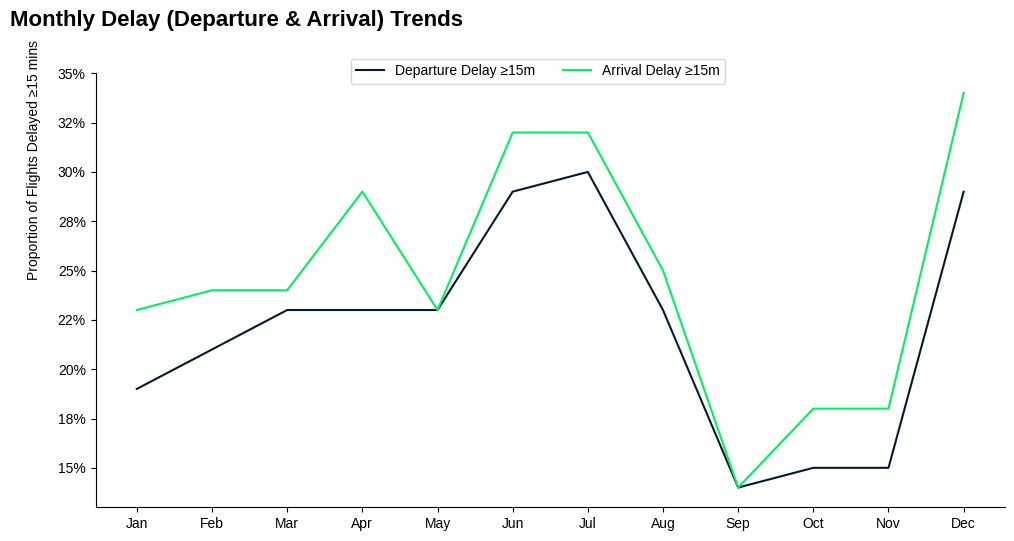

In [44]:
# Plot
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(data=monthly_delay, x='month', y='dep_delayed_15',
            label='Departure Delay ≥15m')
sns.lineplot(data=monthly_delay, x='month', y='arr_delayed_15',
             label='Arrival Delay ≥15m')

# Format y-axis as whole percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))

# Removing ticks and spines
ax.spines[['top', 'right']].set_visible(False)

ax.legend(ncols=2, bbox_to_anchor=(0.7, 1.05))


# Texts
fig.text(-0.01, 1.04, "Monthly Delay (Departure & Arrival) Trends",
         fontsize=16, fontweight='bold')

ax.set_ylabel("Proportion of Flights Delayed ≥15 mins", fontsize=10)
ax.yaxis.set_label_coords(-0.06, 0.8)

ax.set_xlabel("")  # remove x-axis label

plt.tight_layout()
plt.show()

In [45]:
# Weekly Delay Trends
dow_delay = (
    flights_df.groupby('day_of_week', observed=False)[['dep_delayed_15', 'arr_delayed_15']]
    .mean().round(2)
    .reset_index()
)

dow_delay

,day_of_week,dep_delayed_15,arr_delayed_15
0,Mon,0.21,0.24
1,Tue,0.26,0.29
2,Wed,0.25,0.27
3,Thu,0.17,0.17
4,Fri,0.21,0.22
5,Sat,0.24,0.26
6,Sun,0.21,0.24


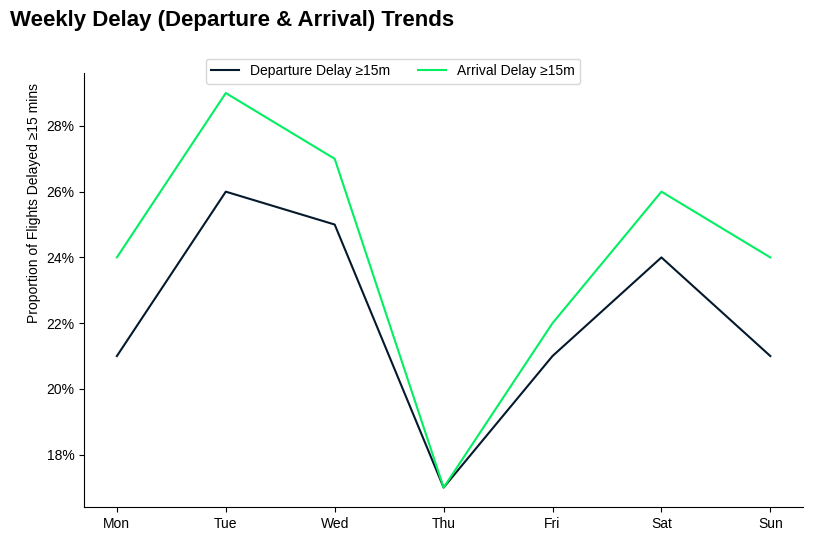

In [46]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(data=dow_delay, x='day_of_week', y='dep_delayed_15',
            label='Departure Delay ≥15m')
sns.lineplot(data=dow_delay, x='day_of_week', y='arr_delayed_15',
             label='Arrival Delay ≥15m')

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))

ax.spines[['top', 'right']].set_visible(False)

ax.legend(ncols=2, bbox_to_anchor=(0.7, 1.05))


# Texts
fig.text(-0.01, 1.04, "Weekly Delay (Departure & Arrival) Trends",
         fontsize=16, fontweight='bold')

ax.set_ylabel("Proportion of Flights Delayed ≥15 mins", fontsize=10)
ax.yaxis.set_label_coords(-0.06, 0.7)

ax.set_xlabel("")

plt.tight_layout()
plt.show()

In [47]:
# Hourly Delay Trends
# Define time bins and labels
time_bins = [0, 6, 9, 12, 15, 18, 21, 24]
time_labels = ['12am–6am', '6am–9am', '9am–12pm', '12pm–3pm', '3pm–6pm', '6pm–9pm', '9pm–12am']
flights_df['time_block'] = pd.cut(flights_df['hour'], bins=time_bins, labels=time_labels, right=False)

# Group by time block
time_delay = (
    flights_df.groupby('time_block', observed=False)[['dep_delayed_15', 'arr_delayed_15']]
    .mean().round(2)
    .reset_index()
)

time_delay

,time_block,dep_delayed_15,arr_delayed_15
0,12am–6am,0.06,0.10
1,6am–9am,0.09,0.14
2,9am–12pm,0.14,0.18
3,12pm–3pm,0.22,0.24
4,3pm–6pm,0.30,0.31
5,6pm–9pm,0.34,0.35
6,9pm–12am,0.36,0.36


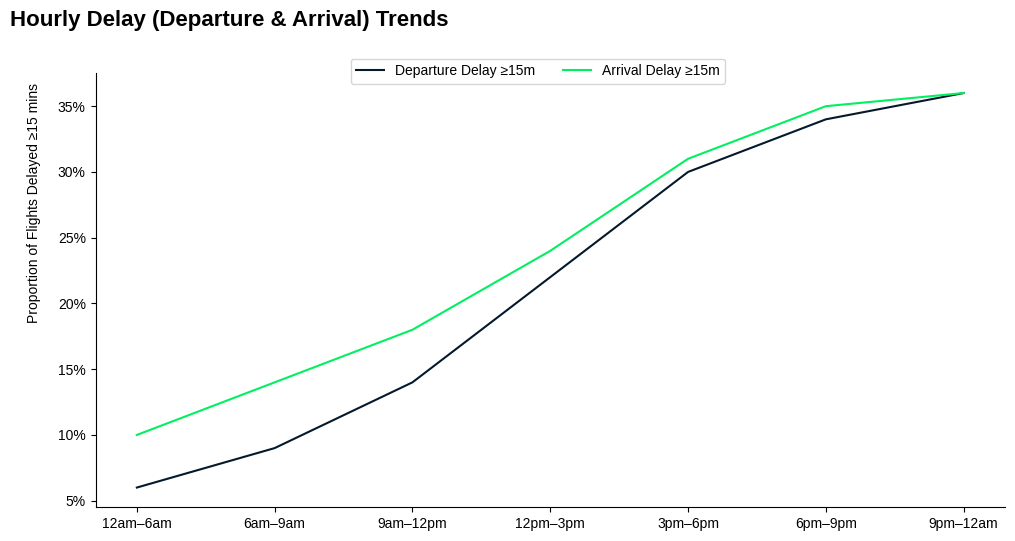

In [48]:
# Plot
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(data=time_delay, x='time_block', y='dep_delayed_15',
             label='Departure Delay ≥15m')
sns.lineplot(data=time_delay, x='time_block', y='arr_delayed_15',
             label='Arrival Delay ≥15m')

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))

ax.spines[['top', 'right']].set_visible(False)

ax.legend(ncols=2, bbox_to_anchor=(0.7, 1.05))


# Texts
fig.text(-0.01, 1.04, "Hourly Delay (Departure & Arrival) Trends",
         fontsize=16, fontweight='bold')

ax.set_ylabel("Proportion of Flights Delayed ≥15 mins", fontsize=10)
ax.yaxis.set_label_coords(-0.06, 0.7)

ax.set_xlabel("")

plt.tight_layout()
plt.show()

### **3. Airport Reliability**

- Which airports experience the most delays?
- Do airport location, traffic volume, or route combinations affect delay frequency?

---

Some airports experience delays more frequently than others, influenced by factors like air traffic volume, location, and operational complexity. Here's what I found when analyzing both origin and destination airports:


#### 🛫 Origin Airports

The three main airports serving New York City—Newark Liberty International (EWR), John F. Kennedy International (JFK), and LaGuardia Airport (LGA)—experience high proportions of delays.

* **EWR** has the highest share of flights delayed by at least 15 minutes, with 25% departure delays and 26% arrival delays out of 117,127 total flights.

* **JFK** follows with 21% departure and 24% arrival delays from 109,079 flights.

* **LGA** has slightly lower, but still significant, rates: 19% departure and 23% arrival delays across 101,140 flights.

These airports are situated in a densely populated and heavily trafficked air corridor, which likely contributes to congestion and frequent scheduling disruptions.



#### 🛬 Destination Airports

The pattern among destination airports is more varied, highlighting two extremes: high-delay regional airports and efficient major hubs.

**High-Delay Regional Airports**

Despite handling fewer flights, these airports show disproportionately high delay rates:

* **Jackson Hole Airport (JAC)**:

  * Over 50% of flights delayed
  * Total flights: 21

* **South Bend International (SBN)**:

  * Over 50% of flights delayed
  * Total flights: 10

* **Columbia Metropolitan (CAE)**:

  * 49% departure, 63% arrival delays
  * Total flights: 106

* **Tulsa International (TUL)**:

  * 45% departure, 49% arrival delays
  * Total flights: 294

* **Will Rogers World (OKC)**:

  * 43% departure, 52% arrival delays
  * Total flights: 315

Such high delay rates may result from limited facilities, staff shortages, or sensitivity to upstream delays from connecting hubs.


**Efficient Major Hubs**

In contrast, several high-traffic airports maintain delay rates well below 25%, suggesting more efficient operations and robust infrastructure:

* **Hartsfield–Jackson Atlanta International (ATL)**:

  * 20% departure, 26% arrival delays

* **Chicago O’Hare International (ORD)**:

  * 23% departure, 24% arrival delays

* **Los Angeles International (LAX)**:

  * 18% departure, 21% arrival delays

* **Orlando International (MCO)**:

  * 21% departure, 23% arrival delays

* **Seattle–Tacoma International (SEA)**:

  * 19% departure, 20% arrival delays

These airports prove that high traffic doesn’t always equal high delays, and may benefit from better runway capacity, staffing, and logistics coordination.

**Exceptionally Punctual Airports**
A few airports stand out for their exceptional punctuality, often paired with moderate or low flight volume:

* **Salt Lake City International (SLC)**:

  * Less than 20% delays on both ends

* **Seattle–Tacoma International (SEA)**:

  * Also under 20% for both departures and arrivals, despite high volume

* **Ted Stevens Anchorage International (ANC)** and **Cyril E. King Airport (STT, St. Thomas)**:

  * Very low delays, although these handle fewer flights overall



#### ✍️ Summary

* **New York-area origin airports** are delay-prone due to airspace congestion.
* **Small regional destinations** often have high delay proportions, likely from limited infrastructure and weather sensitivity.
* **Major hubs like ATL, ORD, LAX, and SEA** maintain low delay rates despite high volume, pointing to operational efficiency.
* **A few standout airports**, like SLC and ANC, show exceptionally low delays and offer models of reliability—especially valuable for time-sensitive travelers.

This contrast highlights how *elay patterns depend not just on size or location, but also on airport efficiency and coordination with air traffic systems.

In [49]:
# Origin Airport Delay Trends
origin_airport_delay = (
    flights_df.groupby(['origin']).agg({'dep_delayed_15': 'mean',
                                       'arr_delayed_15': 'mean',
                                        'flight': 'count'}).round(2).reset_index()
    )

origin_airport_delay.columns = ['Airport', 'Departure Delay ≥15m', 'Arrival Delay ≥15m', 'Total Flights']

origin_airport_delay.sort_values(by='Departure Delay ≥15m', ascending=False, inplace=True)

origin_airport_delay

,Airport,Departure Delay ≥15m,Arrival Delay ≥15m,Total Flights
0,EWR,0.25,0.26,117127
1,JFK,0.21,0.24,109079
2,LGA,0.19,0.23,101140


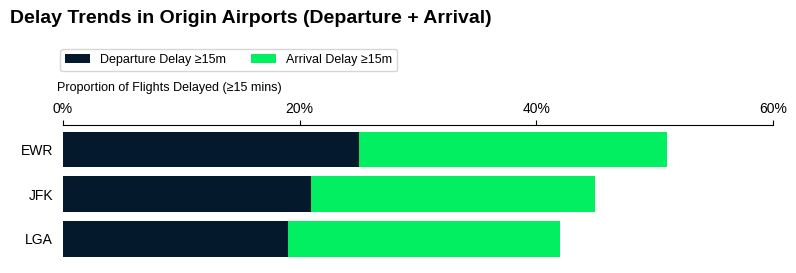

In [50]:
# Plot
fig, ax = plt.subplots(figsize=(8, 3))

# Plot departure delays
ax.barh(
    origin_airport_delay['Airport'],
    origin_airport_delay['Departure Delay ≥15m'],
    label='Departure Delay ≥15m',
    color=custom_palette[0]
)

# Plot arrival delays
ax.barh(
    origin_airport_delay['Airport'],
    origin_airport_delay['Arrival Delay ≥15m'],
    left=origin_airport_delay['Departure Delay ≥15m'],
    label='Arrival Delay ≥15m',
    color=custom_palette[1]
)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
ax.invert_yaxis()

ax.set_xticks(np.arange(0, 0.61, 0.2))
ax.set_xlim(0, 0.6)

ax.tick_params(axis='y', left=False)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.spines[['left', 'right', 'bottom']].set_visible(False)

ax.legend(ncols=2, bbox_to_anchor=(0.48, 1.6),
          prop={'size': 9})

# Texts
fig.text(0.01, 0.85, "Delay Trends in Origin Airports (Departure + Arrival)",
         fontsize=14, fontweight='bold')

ax.set_xlabel("Proportion of Flights Delayed (≥15 mins)", fontsize=9)
ax.xaxis.set_label_coords(0.15, 1.25)

ax.set_ylabel("")  # remove y-axis label

plt.tight_layout()
plt.show()

In [51]:
# Destination Airport Delay Trends
dest_airport_delay = (
    flights_df.groupby(['dest']).agg({'dep_delayed_15': 'mean',
                                       'arr_delayed_15': 'mean',
                                       'flight': 'count'}).round(2).reset_index()
    )

dest_airport_delay.columns = ['Airport', 'Departure Delay ≥15m', 'Arrival Delay ≥15m', 'Total Flights']

dest_airport_delay.sort_values(by='Departure Delay ≥15m', ascending=False, inplace=True)

In [52]:
#pd.set_option('display.max_rows', None)

In [53]:
dest_airport_delay

,Airport,Departure Delay ≥15m,Arrival Delay ≥15m,Total Flights
46,JAC,0.52,0.52,21
86,SBN,0.50,0.30,10
18,CAE,0.49,0.63,106
100,TUL,0.45,0.49,294
66,OKC,0.43,0.52,315
...,...,...,...,...
40,HNL,0.15,0.16,701
3,ANC,0.12,0.12,8
97,STT,0.11,0.14,518
50,LEX,0.00,0.00,1


In [54]:
fig = px.scatter(
    dest_airport_delay,
    x='Departure Delay ≥15m',
    y='Arrival Delay ≥15m',
    size='Total Flights',
    color='Total Flights',
    hover_name='Airport',
    size_max=20,
    title='Departure vs Arrival Delay Rates by Airport',
    labels={
        'Departure Delay ≥15m': 'Departure Delay Rate',
        'Arrival Delay ≥15m': 'Arrival Delay Rate'
    }
)

fig.update_layout(
    xaxis=dict(tickformat='.0%', range=[0, 0.6]),
    yaxis=dict(tickformat='.0%', range=[0, 0.6]),
    height=600
)

fig.show()


### **4. Route-Level Delays**

- **Identify problematic routes**: Which routes have the highest delay proportions?
- **Balance between volume and delays**: Are high-delay routes also high-traffic?
- **Departure vs Arrival delays**: Are delays more often due to departures or arrivals?
- **Common airport patterns**: Are there specific airports frequently appearing in delay-prone routes?

---


#### 1. **Top Delayed Routes (by proportion of delays)**

Let's filter for routes with high proportions of delays (departure or arrival ≥ 50%) and more than, say, 10 flights to avoid overemphasis on tiny sample sizes:

| Route     | Dep Delay | Arr Delay | Total Flights  |
| --------- | --------- | --------- | -------------- |
| LGA - SBN | 0.67      | 0.50      | 6 (low sample) |
| EWR - JAC | 0.58      | 0.58      | 19             |
| LGA - CAE | 0.58      | 0.58      | 12             |
| EWR - CAE | 0.48      | 0.64      | 94             |
| EWR - TYS | 0.46      | 0.50      | 313            |
| EWR - OKC | 0.43      | 0.52      | 315            |

🔸 **Takeaway**: The **EWR - CAE** and **EWR - TYS** routes stand out with high delay proportions and a reasonable number of flights — making them operationally significant, meaning they deserve attention for improvement (e.g., in scheduling, staffing, or airport coordination).


#### 2. **High Volume Routes With Notable Delays**

Routes with thousands of flights but moderate delays are also worth monitoring due to scale of impact:

| Route     | Dep Delay | Arr Delay | Total Flights |
| --------- | --------- | --------- | ------------- |
| EWR - STL | 0.32      | 0.32      | 2,374         |
| LGA - MDW | 0.30      | 0.26      | 2,037         |
| JFK - SYR | 0.26      | 0.25      | 1,292         |
| EWR - ATL | 0.23      | 0.27      | 4,876         |
| EWR - ORD | 0.24      | 0.26      | 5,828         |
| EWR - DEN | 0.29      | 0.29      | 2,815         |

🔸 **Takeaway**: While delay proportions here are lower, these routes account for a large number of passengers. Small improvements here could yield big customer experience gains.


#### 3. **Common Airports in High-Delay Routes**

Let’s look at repeated appearances of certain airports in high-delay routes:

* **EWR (Newark)**: Appears most often in both high-delay and high-volume delay-prone routes.
* **LGA (LaGuardia)**: Also common in moderate to high-delay routes.
* **JFK (Kennedy)**: Present but with fewer extreme delay rates.

🔸 **Takeaway**: **EWR is a hotspot** for delay-prone routes. This could reflect airport congestion, airspace limitations, or airline scheduling issues.


#### 4. **Departure vs Arrival Delays**

Some routes have higher departure delay proportions than arrival and vice versa. This helps pinpoint where delays originate:

* **EWR - CAE**: Higher arrival delay (0.64) than departure (0.48) → might suggest issues at destination.
* **LGA - SBN**: Higher departure delay (0.67) than arrival (0.50) → origin airport or airline could be a factor.


In [55]:
# Create Route column
flights_df['route'] = flights_df['origin'] + ' - ' + flights_df['dest']

In [56]:
# Group by Route and compute delay
route_delay = (
    flights_df.groupby(['route']).agg({'dep_delayed_15': 'mean',
                                       'arr_delayed_15': 'mean',
                                       'flight': 'count'}).round(2).reset_index()
    )

route_delay.columns = ['Route', 'Departure Delay ≥15m', 'Arrival Delay ≥15m', 'Total Flights']

route_delay.sort_values(by='Total Flights', ascending=False, inplace=True)

route_delay

,Route,Departure Delay ≥15m,Arrival Delay ≥15m,Total Flights
116,JFK - LAX,0.16,0.20,11159
155,LGA - ATL,0.19,0.27,10041
203,LGA - ORD,0.20,0.21,8507
145,JFK - SFO,0.18,0.22,8109
169,LGA - CLT,0.18,0.25,5961
...,...,...,...,...
113,JFK - JAC,0.00,0.00,2
89,JFK - BHM,0.00,0.00,1
120,JFK - MEM,0.00,0.00,1
151,JFK - STL,1.00,0.00,1


In [57]:
# Plotly visual
fig = px.scatter(
    route_delay,
    x='Departure Delay ≥15m',
    y='Arrival Delay ≥15m',
    size='Total Flights',
    color='Total Flights',
    hover_name='Route',
    size_max=20,
    title='Departure vs Arrival Delay Rates by Route',
    labels={
        'Departure Delay ≥15m': 'Departure Delay Rate',
        'Arrival Delay ≥15m': 'Arrival Delay Rate'
    }
)

fig.update_layout(
    xaxis=dict(tickformat='.0%', range=[0, 0.7]),
    yaxis=dict(tickformat='.0%', range=[0, 0.7]),
    height=600
)

fig.show()

### **5. Airline Routes Delay Trends**

- Which high-traffic airline routes experience the most delays, and why are they operationally important?
- Are there any airline routes that manage to combine high traffic with low delays, and what can we learn from them?

---

#### 🔝 Top Delay-Prone Routes by Airline

Three routes stood out with consistently high delay scores and substantial traffic:

* **JetBlue Airways – JFK to DEN**

  **Composite Delay Score:** 0.37 | **Total Flights:** 336

  This route experienced delays in nearly 4 out of every 10 flights, making it the most delay-prone high-volume route in the dataset.

* **American Airlines – JFK to EGE (Eagle County, CO)**

  **Composite Delay Score:** 0.36 | **Total Flights:** 101

  Despite a lower flight count, this route consistently showed high delay proportions at both departure and arrival.

* **Mesa Airlines – LGA to MSP (Minneapolis)**

  **Composite Delay Score:** 0.36 | **Total Flights:** 278

  High delay frequencies at both ends suggest a recurring operational challenge for this route.

These routes are **operationally significant**, affecting a large number of passengers and likely contributing disproportionately to overall airline delays. Airlines operating these routes could benefit from a targeted review of delay drivers—such as airport congestion, turnaround time, or weather patterns—specific to these origin-destination pairs.


#### 🌟 Standout Efficient Low-Delay, High-Traffic Routes

In contrast, some airline routes combine high traffic with low delay rates, signaling operational efficiency and reliability:

* **Virgin America – JFK to SFO**

  **Composite Delay Score:** 0.22 | **Total Flights:** 1,402

  Despite being a transcontinental route—which typically faces more delays—Virgin America maintained strong schedule performance.

* **Virgin America – JFK to LAX**

  **Composite Delay Score:** 0.18 | **Total Flights:** 1,779

  Another coast-to-coast route with low delay rates, suggesting effective planning and possibly favorable airport logistics.

* **US Airways – LGA to DCA**

  **Composite Delay Score:** 0.18 | **Total Flights:** 4,468

  One of the busiest routes in the dataset, yet it consistently runs on time. The short flight distance and efficient turnaround processes likely contribute to this performance.

These routes highlight **best practices** in operations. Studying them in more detail—looking at crew management, gate availability, or time-of-day scheduling—could help inform strategies to improve delay-prone routes.



#### ⚠️ Perfect Delay Routes with Low Flight Counts

Some routes showed 100% delay rates, such as:

* **SkyWest Airlines – LGA to ORD**
* **United Airlines – EWR to RDU**

However, these routes had fewer than 5 flights, making them statistically unreliable. While notable, they likely reflect isolated incidents rather than systemic issues and should not be over-interpreted.

In [58]:
# Airline by routes
airline_routes = (
    flights_df.groupby(['airline_name', 'route']).agg({'dep_delayed_15': 'mean',
                                       'arr_delayed_15': 'mean',
                                       'flight': 'count'}).round(2).reset_index()
)

airline_routes.columns = ['Airline', 'Route', 'Departure Delay ≥15m', 'Arrival Delay ≥15m', 'Total Flights']

airline_routes.sort_values(by='Departure Delay ≥15m', ascending=False, inplace=True)

#airline_routes

In [59]:
# composite score
airline_routes['composite_delay_score'] = (
    0.5 * airline_routes['Departure Delay ≥15m'] +
    0.5 * airline_routes['Arrival Delay ≥15m']
).round(2)

In [60]:
top_routes_per_airline = (
    airline_routes.sort_values(['Airline', 'composite_delay_score'], ascending=[True, False])
    .groupby('Airline')
    .head(3)
    .reset_index(drop=True)
)

top_routes_per_airline

,Airline,Route,Departure Delay ≥15m,Arrival Delay ≥15m,Total Flights,composite_delay_score
0,AirTran Airways Corporation,LGA - ATL,0.28,0.36,2278,0.32
1,AirTran Airways Corporation,LGA - CAK,0.29,0.32,842,0.30
2,AirTran Airways Corporation,LGA - MKE,0.04,0.18,55,0.11
3,Alaska Airlines Inc.,EWR - SEA,0.14,0.15,709,0.15
4,American Airlines Inc.,JFK - EGE,0.37,0.35,101,0.36
5,American Airlines Inc.,JFK - SAN,0.27,0.34,357,0.31
6,American Airlines Inc.,JFK - ORD,0.33,0.27,355,0.30
7,Delta Air Lines Inc.,JFK - STL,1.00,0.00,1,0.50
8,Delta Air Lines Inc.,JFK - SAT,0.33,0.26,302,0.30
9,Delta Air Lines Inc.,LGA - PIT,0.31,0.27,201,0.29


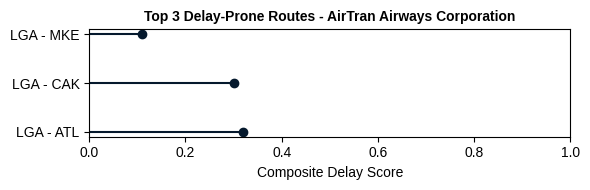

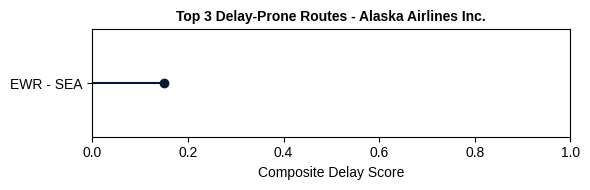

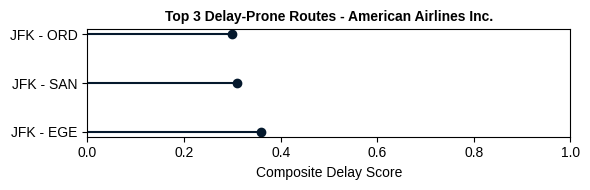

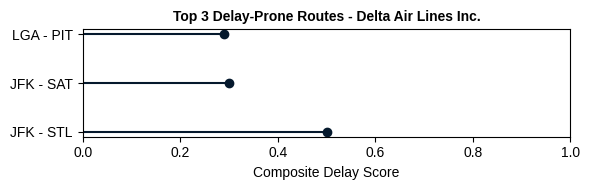

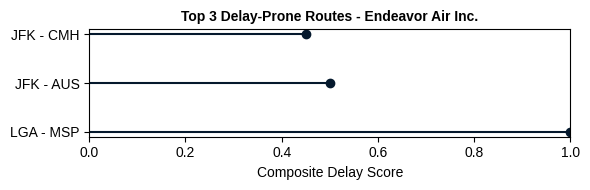

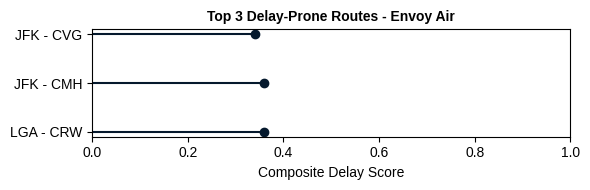

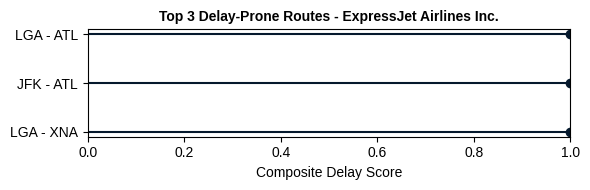

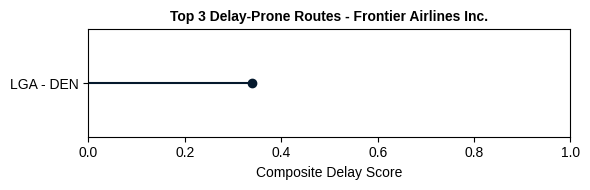

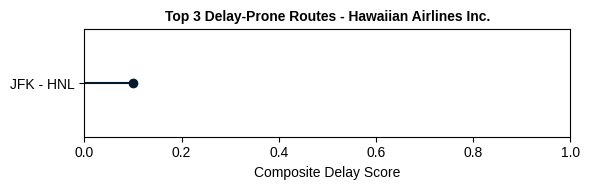

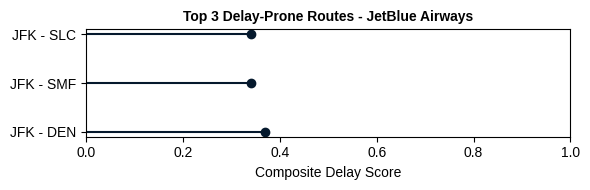

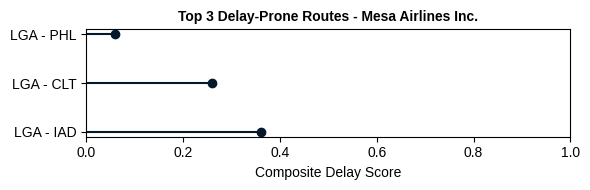

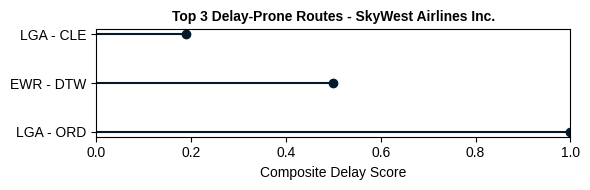

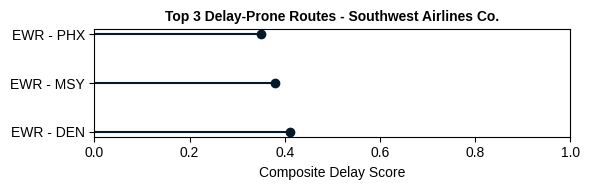

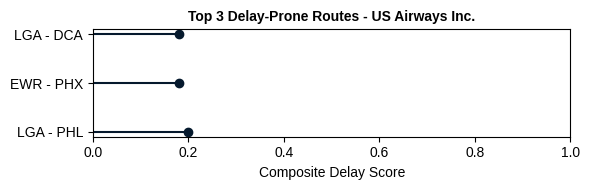

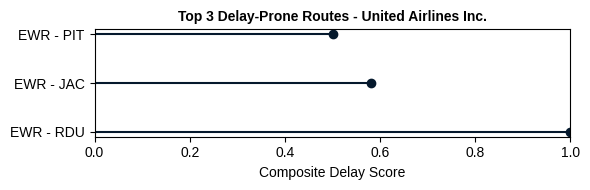

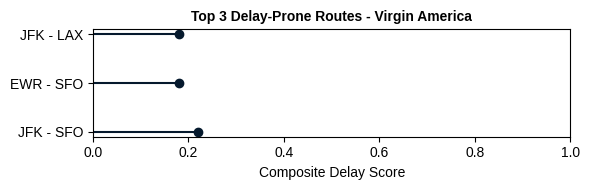

In [61]:
# Plot for each airline separately
airlines = top_routes_per_airline['Airline'].unique()

for airline in airlines:
    subset = top_routes_per_airline[top_routes_per_airline['Airline'] == airline]

    plt.figure(figsize=(6, 2))
    plt.hlines(y=subset['Route'], xmin=0, xmax=subset['composite_delay_score'], color=custom_palette[0])
    plt.plot(subset['composite_delay_score'], subset['Route'], "o", color=custom_palette[0])

    plt.title(f"Top 3 Delay-Prone Routes - {airline}", fontsize=10, fontweight='bold')
    plt.xlabel("Composite Delay Score")
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

### **6. Travel Distance Delay**

To understand how flight distance relates to delays, distances were categorized into three groups:

* **Short haul:** ≤ 1,000 miles
* **Medium haul:** 1,001 to 2,500 miles
* **Long haul:** > 2,500 miles

This categorization helps examine whether longer flights tend to experience more or fewer delays in departures and arrivals.

| Distance Haul | Departure Delay ≥15m | Arrival Delay ≥15m | Total Flights |
| ------------- | -------------------- | ------------------ | ------------- |
| Short         | 0.23                 | 0.25               | 182,594       |
| Medium        | 0.21                 | 0.23               | 129,951       |
| Long          | 0.21                 | 0.23               | 14,801        |

#### Key Insights:

* **Short-haul flights have the highest delay rates** (23% departure, 25% arrival), despite having the largest volume of flights by far. This may be due to quick turnaround times and higher scheduling density at airports.

* **Medium- and long-haul flights show slightly lower delay rates** (\~21% departure and 23% arrival). Longer flights typically have more buffer time and less frequent scheduling, which might help reduce delay occurrences.

* Although long-haul flights have fewer total flights, their delay rates are comparable to medium-haul flights, suggesting operational factors other than distance play a strong role in delays.

#### Implications:

* Airlines and airports might focus on improving short-haul flight operations, especially turnaround and gate management, to reduce the higher delay frequency on these routes.

* Medium and long-haul flights may benefit from maintaining current practices that help keep delay rates relatively lower, but continuous monitoring is important.

In [62]:
# Distance Delay
# Categorize distance
def classify_dist(distance):
    if distance <= 1000:
        return 'Short'
    elif distance <= 2500:
        return 'Medium'
    else:
        return 'Long'

# Apply
flights_df['dist_haul'] = flights_df['distance'].apply(classify_dist)

In [63]:
# Distance Haul delay trends
dist_haul_delay = (
    flights_df.groupby(['dist_haul']).agg({'dep_delayed_15': 'mean',
                                       'arr_delayed_15': 'mean',
                                        'flight': 'count'}).round(2).reset_index()
    )

dist_haul_delay.columns = ['Distance Haul', 'Departure Delay ≥15m', 'Arrival Delay ≥15m', 'Total Flights']

dist_haul_delay.sort_values(by='Departure Delay ≥15m', ascending=False, inplace=True)

dist_haul_delay

,Distance Haul,Departure Delay ≥15m,Arrival Delay ≥15m,Total Flights
2,Short,0.23,0.25,182594
0,Long,0.21,0.23,14801
1,Medium,0.21,0.23,129951


### **7. Clustering Analysis of Destination Airport**

The destination airports were grouped into five clusters based on departure delay, arrival delay, and total flight volumes. Each cluster reveals unique operational characteristics:

| Cluster | Intuitive Label                 | Description                                                                                                                      | Example Airports                                                                                                                                          |
| ------- | ------------------------------- | -------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 0       | Moderate-Delay, Low-Traffic  | Airports with some departure delays but relatively low flight volumes — smaller airports facing emerging operational challenges. | SBN (South Bend), BHM (Birmingham), TYS (Knoxville), ALB (Albany)  |
| 1       | Efficient, Average-Traffic   | Mid-tier airports with slightly below-average delays handling moderate traffic — generally well-functioning.                     | ORD (Chicago O'Hare), FLL (Fort Lauderdale), MCO (Orlando), DTW (Detroit) |
| 2       | High-Delay, Low-Traffic      | Small airports suffering severe departure and arrival delays despite low traffic, indicating operational problems.               | JAC (Jackson Hole), CAE (Columbia), TUL (Tulsa), OKC (Oklahoma City)                                                                                      |
| 3       | High-Traffic, Efficient Hubs | Major hubs with very high flight volumes and low delays — examples of strong operational efficiency.                             | DEN (Denver), MSP (Minneapolis), SEA (Seattle), IAH (Houston), PHL (Philadelphia)                 |
| 4       | Low-Traffic, Highly Efficient | Airports with minimal delays and low traffic — likely small regional or niche airports with smooth operations.                   | ANC (Anchorage), STT (St. Thomas), LEX (Lexington), PSP (Palm Springs)                                                                                    |

#### Key Questions Answered by the Clustering:

1. **Which airports suffer the most severe delays despite handling fewer flights?**
   Cluster 2 airports, such as Jackson Hole (JAC) and Tulsa (TUL), show high delays despite low traffic, indicating operational challenges at these smaller airports.

2. **Where are the most efficient airports located, considering both delays and flight volumes?**
   Clusters 1 and 3 highlight efficient airports: Cluster 1 includes busy mid-tier airports like Chicago O'Hare (ORD) and San Francisco (SFO), while Cluster 3 includes large hubs like Denver (DEN) and Seattle (SEA) with high traffic but low delays.

3. **How do airport delay patterns correlate with traffic volume?**
   Clusters demonstrate that some airports have moderate delays with low traffic (Cluster 0: e.g., Birmingham (BHM)), while others handle high traffic efficiently (Cluster 3: e.g., Minneapolis (MSP)).

4. **Which airports might benefit most from targeted operational improvements?**
   Airports in Clusters 0 and 2, such as South Bend (SBN) and Columbia (CAE), face notable delays despite low or moderate traffic and could be prioritized for delay reduction efforts.

5. **Are there examples of small airports operating with minimal delays?**
   Cluster 4 airports like Anchorage (ANC) and Palm Springs (PSP) have low traffic and minimal delays, serving as possible models of operational smoothness at smaller airports.

In [64]:
# Selecting features
features = dest_airport_delay[['Departure Delay ≥15m', 'Arrival Delay ≥15m', 'Total Flights']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

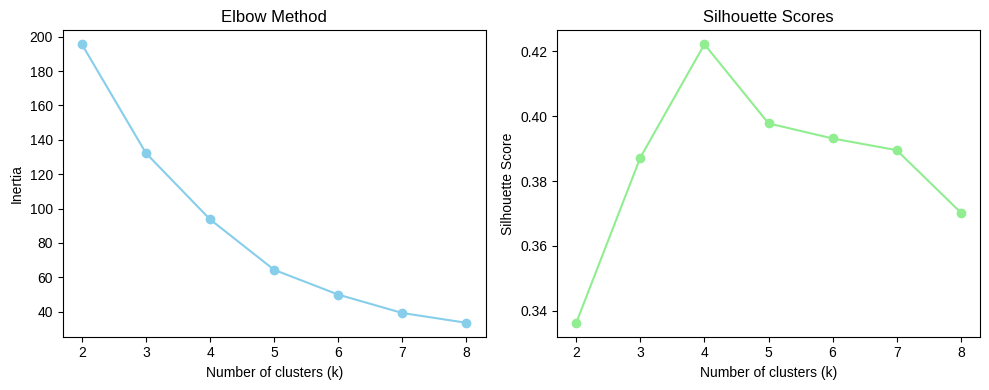

In [65]:
# Clustering
# Step 1: Decide the range of k to try
k_values = range(2, 9)
inertia = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))

# Step 2: Plot the Elbow and Silhouette Score to choose optimal k
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o', color='skyblue')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='lightgreen')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [66]:
# Step 3: Fit final model based on optimal k
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
dest_airport_delay['Cluster'] = kmeans.fit_predict(features_scaled)

In [67]:
# Step 4: Inspect the cluster centers to decide labeling strategy
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=features.columns)

centroids_df

,Departure Delay ≥15m,Arrival Delay ≥15m,Total Flights
0,0.778556,0.469121,-0.537875
1,-0.701412,-0.508291,2.357771
2,2.501939,3.346678,-0.713519
3,-0.421484,-0.310929,-0.066159
4,-2.346902,-2.312745,-0.725015


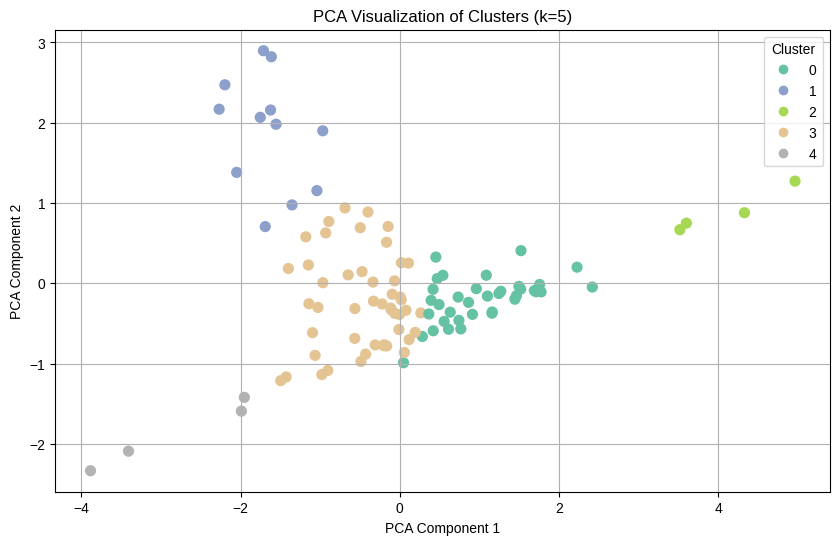

In [68]:
# Visualize Clusters with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dest_airport_delay['Cluster'],
                      cmap='Set2', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'PCA Visualization of Clusters (k={optimal_k})')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)
plt.show()

In [69]:
pd.set_option('display.max_colwidth', None)

In [70]:
# Get list of Airports per clusters
cluster_airports = dest_airport_delay.groupby('Cluster')['Airport'].apply(list)
cluster_airports

,Airport
Cluster,
0,"[SBN, BHM, TYS, ALB, PVD, DSM, HDN, MHT, GSP, CRW, ILM, MSN, RIC, SMF, TVC, CHO, GSO, MCI, BGR, GRR, SAT, OMA, ABQ, DAY, BDL, ORF, CAK, CVG, PWM, MYR, MKE, JAX, SAV, EGE, MEM, SDF]"
1,"[ORD, FLL, MCO, DTW, DCA, SFO, ATL, CLT, BOS, LAX, MIA, DFW]"
2,"[JAC, CAE, TUL, OKC]"
3,"[MTJ, MDW, STL, PDX, OAK, BNA, BTV, SYR, ROC, IAD, BWI, DEN, CMH, CHS, IND, BQN, BUR, MSY, HOU, RDU, LGB, PIT, PBI, CLE, BUF, AUS, PSE, PHL, TPA, SJC, SAN, MSP, SJU, AVL, PHX, BZN, SLC, IAH, RSW, SEA, ACK, LAS, EYW, MVY, SRQ, XNA, SNA, HNL]"
4,"[ANC, STT, LEX, PSP]"


In [71]:
# Map clusters to intuitive short labels with explicit order
cluster_map = {
    0: "Mod Delay, Low Traffic",
    1: "Low Delay, High Traffic",
    2: "High Delay, Low Traffic",
    3: "Low Delay, Avg Traffic",
    4: "Very Low Delay, Low Traffic"
}
dest_airport_delay['Cluster Label'] = dest_airport_delay['Cluster'].map(cluster_map)

# Define the desired order explicitly
cluster_order = [
    "Mod Delay, Low Traffic",
    "Low Delay, High Traffic",
    "High Delay, Low Traffic",
    "Low Delay, Avg Traffic",
    "Very Low Delay, Low Traffic"
]

# Make 'Cluster Label' a categorical variable with order
dest_airport_delay['Cluster Label'] = pd.Categorical(dest_airport_delay['Cluster Label'],
                                                     categories=cluster_order,
                                                     ordered=True)

In [72]:
# Interactive Scatter plot
# Prepare colors matching px.colors.qualitative.Set2 palette
colors = px.colors.qualitative.Set2

# Create a Plotly figure with one trace per cluster
fig = go.Figure()

max_flights = dest_airport_delay['Total Flights'].max()

for i, cluster in enumerate(cluster_order):
    df_cluster = dest_airport_delay[dest_airport_delay['Cluster Label'] == cluster]
    fig.add_trace(go.Scatter(
        x=df_cluster['Departure Delay ≥15m'],
        y=df_cluster['Arrival Delay ≥15m'],
        mode='markers',
        marker=dict(
            size=df_cluster['Total Flights'],
            sizemode='area',
            sizeref=2.*max_flights/(50.**2),  # scale sizes similar to px.scatter's size_max=50
            sizemin=4,
            color=colors[i],
            line=dict(width=1, color='black'),
            opacity=0.7
        ),
        name=cluster,
        text=df_cluster['Airport'],
        hoverinfo='text+x+y',
        visible=True
    ))

# Build dropdown buttons for filtering clusters
buttons = []

# All clusters button - show all traces
buttons.append(dict(
    label="All Clusters",
    method="update",
    args=[{"visible": [True] * len(cluster_order)},
          {"title": "All Clusters"}]
))

# Individual cluster buttons
for i, cluster in enumerate(cluster_order):
    visible = [False] * len(cluster_order)
    visible[i] = True
    buttons.append(dict(
        label=cluster,
        method="update",
        args=[{"visible": visible},
              {"title": f"Cluster: {cluster}"}]
    ))

# Attach dropdown menu and layout updates
fig.update_layout(
    title="Airport Delay Risk Clusters (Bubble size = Flight Volume)",
    xaxis_title='Departure Delay ≥15 min',
    yaxis_title='Arrival Delay ≥15 min',
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=1.02,
        y=0.7,
        xanchor='left',
        yanchor='top',
        showactive=True,
        direction='down'
    )],
    legend_title_text='Cluster',
    margin=dict(r=180),
    xaxis=dict(tickformat='.0%', range=[-0.01, 0.65]),
    yaxis=dict(tickformat='.0%', range=[-0.01, 0.65]),
    height=600,
    width=1200
)

fig.show()

### **8. Clustering Analysis of Flight Routes**

The flight routes were grouped into four clusters based on their delay patterns and route popularity (traffic). Each cluster uncovers distinct route performance characteristics, shedding light on demand concentration, inefficiencies, and strategic priorities.

| Cluster | Intuitive Label                     | Description                                                                                         | Example Routes            |
| ------- | ----------------------------------- | --------------------------------------------------------------------------------------------------- | ------------------------- |
| 0       | Moderate-Delay, Low-Traffic Routes     | A large set of medium-demand routes connecting major and secondary airports with moderate delays.   | JFK–PBI, EWR–MSY, LGA–TPA |
| 1       | High-Delay, Low-Traffic Routes     | Rarely traveled routes often experiencing performance issues — candidates for review or scaling.    | EWR–OKC, LGA–CAE, JFK–STL |
| 2       | Low-Delay, High-Traffic Routes  | Popular, frequently traveled domestic corridors between major hubs — crucial to overall operations. | JFK–LAX, LGA–ATL, JFK–MIA |
| 3       | Low-Delay, Low-Traffic Routes | Longer or leisure-heavy routes with low traffic, often serving vacation destinations.  | JFK–SEA, LGA–SRQ, EWR–SJU |

---

#### Key Questions Answered by the Clustering:

**1. Which routes are the most essential from a network and volume perspective?**
Cluster 2 contains key domestic corridors like JFK–LAX and LGA–ATL that carry high passenger volumes. Their performance heavily influences overall airline metrics and customer satisfaction.

**2. Where are the greatest inefficiencies or underperforming routes found?**
Cluster 1 includes routes such as EWR–OKC and JFK–STL that experience delays despite relatively low traffic. These may warrant operational review or adjustments in scheduling and resourcing.

**3. Which routes serve as consistent, moderately loaded connections across the network?**
Cluster 0 represents a broad set of routes connecting primary and secondary markets, such as EWR–MSY and JFK–PBI. These routes are foundational but may not dominate volume charts.

**4. Which routes target leisure or seasonal travel patterns?**
Cluster 3 routes like JFK–SEA, EWR–SJU, and LGA–SRQ likely align with vacation or long-distance travel. Performance on these routes can vary seasonally, and proactive capacity management may be important.

**5. Which clusters may guide future network planning?**
Cluster 2 routes are essential to maintain and optimize. Cluster 1 routes could be scaled back, restructured, or considered for partnerships with regional carriers. Clusters 0 and 3 reflect opportunities for nuanced, region-specific strategy.

In [73]:
# Selecting features
features_routes = route_delay[['Departure Delay ≥15m', 'Arrival Delay ≥15m', 'Total Flights']]

# Standardize the features
scaler = StandardScaler()
features_routes_scaled = scaler.fit_transform(features_routes)

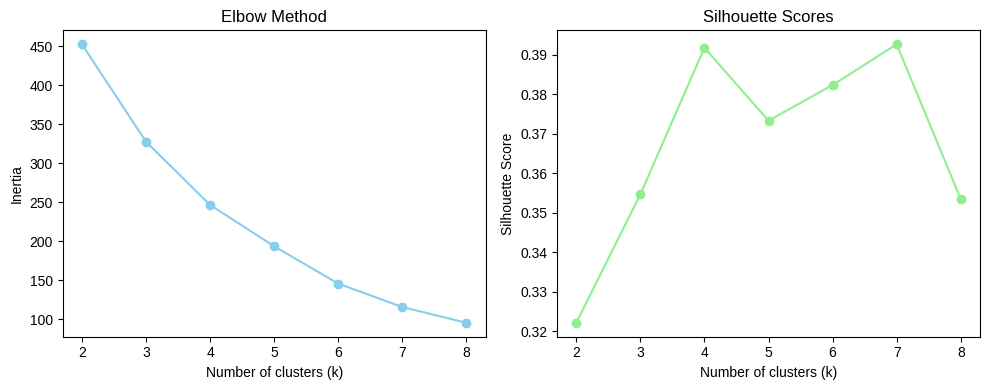

In [74]:
# Clustering
# Step 1: Decide the range of k to try
k_values = range(2, 9)
inertia = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_routes_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_routes_scaled, kmeans.labels_))

# Step 2: Plot the Elbow and Silhouette Score to choose optimal k
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o', color='skyblue')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='lightgreen')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [75]:
# Step 3: Fit final model based on optimal k
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
route_delay['Cluster'] = kmeans.fit_predict(features_routes_scaled)

In [76]:
# Step 4: Inspect the cluster centers to decide labeling strategy
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=features_routes.columns)

centroids_df

,Departure Delay ≥15m,Arrival Delay ≥15m,Total Flights
0,0.359955,0.370049,-0.344838
1,3.083237,2.386237,-0.738175
2,-0.470702,-0.286293,1.709305
3,-0.957076,-1.023757,-0.466965


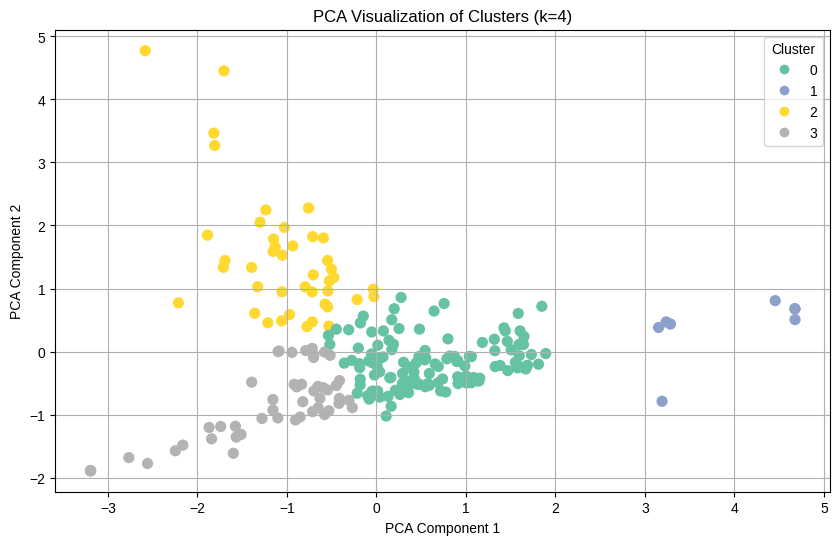

In [77]:
# Visualize Clusters with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_routes_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=route_delay['Cluster'],
                      cmap='Set2', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'PCA Visualization of Clusters (k={optimal_k})')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)
plt.show()

In [78]:
# Get list of routes per clusters
cluster_routes = route_delay.groupby('Cluster')['Route'].apply(list)
cluster_routes

,Route
Cluster,
0,"[EWR - DEN, JFK - IAD, EWR - CVG, EWR - STL, EWR - PBI, EWR - TPA, EWR - MSP, EWR - BNA, JFK - ORD, LGA - TPA, LGA - MDW, LGA - CLE, EWR - MDW, LGA - CMH, JFK - PBI, LGA - IAD, JFK - ROC, EWR - RIC, JFK - MSY, EWR - DCA, LGA - MKE, JFK - AUS, EWR - RDU, JFK - BTV, EWR - CHS, JFK - RSW, JFK - SYR, JFK - PWM, EWR - MCI, JFK - JAX, EWR - IND, JFK - PIT, EWR - IAD, EWR - JAX, JFK - BWI, EWR - SAN, EWR - MSY, JFK - DTW, EWR - MKE, EWR - DAY, JFK - MSP, EWR - GSO, LGA - PIT, JFK - CVG, EWR - HOU, EWR - BUF, JFK - PHL, EWR - BTV, EWR - SDF, EWR - MEM, LGA - CAK, EWR - MHT, JFK - PDX, LGA - RSW, EWR - PWM, EWR - OMA, JFK - HOU, JFK - CMH, JFK - ORF, JFK - DEN, JFK - BNA, JFK - DFW, EWR - GSP, EWR - GRR, EWR - CMH, EWR - SAV, JFK - CLE, JFK - LGB, JFK - IND, EWR - PDX, EWR - ORF, EWR - BWI, LGA - RIC, EWR - ROC, LGA - CHS, LGA - GSO, EWR - ALB, EWR - BDL, EWR - DSM, JFK - BUR, EWR - PVD, JFK - PSE, LGA - BGR, EWR - SLC, EWR - MSN, JFK - SAT, JFK - SJC, EWR - SAT, JFK - OAK, EWR - BQN, EWR - XNA, JFK - SMF, LGA - BTV, LGA - PWM, JFK - IAH, LGA - SYR, LGA - BHM, LGA - TYS, JFK - MCI, JFK - ABQ, ...]"
1,"[EWR - OKC, EWR - TYS, EWR - TUL, EWR - CAE, EWR - JAC, LGA - CAE, LGA - SBN, JFK - STL]"
2,"[JFK - LAX, LGA - ATL, LGA - ORD, JFK - SFO, LGA - CLT, EWR - ORD, JFK - BOS, LGA - MIA, JFK - MCO, EWR - BOS, EWR - SFO, LGA - DTW, EWR - MCO, EWR - CLT, EWR - ATL, EWR - LAX, JFK - SJU, LGA - DFW, LGA - DCA, JFK - FLL, LGA - BOS, JFK - LAS, LGA - FLL, EWR - IAH, EWR - FLL, LGA - DEN, LGA - MCO, LGA - MSP, JFK - BUF, LGA - RDU, JFK - MIA, LGA - BNA, JFK - DCA, EWR - DFW, EWR - DTW, JFK - RDU, JFK - TPA, LGA - IAH, JFK - CLT, EWR - PHX, EWR - MIA, LGA - PBI]"
3,"[JFK - SLC, JFK - SEA, EWR - LAS, JFK - PHX, JFK - ATL, EWR - SEA, LGA - STL, EWR - CLE, JFK - SAN, EWR - RSW, EWR - SJU, LGA - MSY, EWR - AUS, JFK - CHS, LGA - MEM, EWR - SNA, LGA - SRQ, LGA - XNA, LGA - PHL, JFK - BQN, EWR - PIT, JFK - SRQ, LGA - HOU, EWR - HNL, LGA - MCI, JFK - HNL, LGA - DAY, JFK - STT, JFK - ACK, LGA - CVG, LGA - ROC, JFK - MVY, LGA - SDF, EWR - STT, LGA - JAX, LGA - BUF, EWR - EGE, LGA - IND, LGA - SAV, LGA - GRR, EWR - BZN, JFK - PSP, LGA - BWI, LGA - AVL, EWR - ANC, EWR - SBN, LGA - MYR, JFK - JAC, JFK - BHM, JFK - MEM, LGA - LEX]"


In [79]:
# Map clusters to intuitive short labels with explicit order
cluster_map = {
    0: "Mod Delay, Low Traffic",
    1: "High Delay, Low Traffic",
    2: "Low Delay, High Traffic",
    3: "Low Delay, Low Traffic"
}
route_delay['Cluster Label'] = route_delay['Cluster'].map(cluster_map)

# Define the desired order explicitly
cluster_order = [
    "Mod Delay, Low Traffic",
    "High Delay, Low Traffic",
    "Low Delay, High Traffic",
    "Low Delay, Low Traffic"
]

# Make 'Cluster Label' a categorical variable with order
route_delay['Cluster Label'] = pd.Categorical(route_delay['Cluster Label'],
                                                     categories=cluster_order,
                                                     ordered=True)

In [80]:
# Interactive Scatter plot
# Prepare colors matching px.colors.qualitative.Set2 palette
colors = px.colors.qualitative.Set2

# Create a Plotly figure with one trace per cluster
fig = go.Figure()

max_flights = route_delay['Total Flights'].max()

for i, cluster in enumerate(cluster_order):
    df_cluster = route_delay[route_delay['Cluster Label'] == cluster]
    fig.add_trace(go.Scatter(
        x=df_cluster['Departure Delay ≥15m'],
        y=df_cluster['Arrival Delay ≥15m'],
        mode='markers',
        marker=dict(
            size=df_cluster['Total Flights'],
            sizemode='area',
            sizeref=2.*max_flights/(50.**2),  # scale sizes similar to px.scatter's size_max=50
            sizemin=4,
            color=colors[i],
            line=dict(width=1, color='black'),
            opacity=0.7
        ),
        name=cluster,
        text=df_cluster['Route'],
        hoverinfo='text+x+y',
        visible=True
    ))

# Build dropdown buttons for filtering clusters
buttons = []

# All clusters button - show all traces
buttons.append(dict(
    label="All Clusters",
    method="update",
    args=[{"visible": [True] * len(cluster_order)},
          {"title": "All Clusters"}]
))

# Individual cluster buttons
for i, cluster in enumerate(cluster_order):
    visible = [False] * len(cluster_order)
    visible[i] = True
    buttons.append(dict(
        label=cluster,
        method="update",
        args=[{"visible": visible},
              {"title": f"Cluster: {cluster}"}]
    ))

# Attach dropdown menu and layout updates
fig.update_layout(
    title="Route Delay Risk Clusters (Bubble size = Flight Volume)",
    xaxis_title='Departure Delay ≥15 min',
    yaxis_title='Arrival Delay ≥15 min',
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=1.02,
        y=0.7,
        xanchor='left',
        yanchor='top',
        showactive=True,
        direction='down'
    )],
    legend_title_text='Cluster',
    margin=dict(r=180),
    xaxis=dict(tickformat='.0%', range=[-0.01, 0.75]),
    yaxis=dict(tickformat='.0%', range=[-0.01, 0.75]),
    height=600,
    width=1200
)

fig.show()

# Feature Engineering

In this section, several new features were engineered to capture key patterns and operational characteristics observed in the flight delay data. These features  are meant to enhance the dataset’s predictive power by incorporating domain insights and EDA findings.

### Steps:

1. **Destination Airport Clusters (`dest_cluster`)**
   Each destination airport was assigned a cluster label based on its delay patterns and traffic characteristics. This grouping captures the operational profile of airports and helps generalize patterns beyond individual airports.

2. **Route Clusters (`route_cluster`)**
   Flight routes were similarly clustered based on delay and traffic attributes, grouping similar routes to better represent route-level behavior and reduce sparsity.

3. **Airline Average Delays (`airline_avg_arr_delay`, `airline_avg_dep_delay`)**
   Calculated the average arrival and departure delay rates per airline. These features quantify airline-specific performance trends and help model differences in operational efficiency.

4. **Route Density**
   Measured how busy each route is by counting the total number of flights on that route. This captures traffic volume effects, which can influence delay probabilities.

5. **Red-Eye Flight Flag**
   Created a binary flag to identify red-eye flights (scheduled departures between 10 PM and 5 AM). These flights often experience distinct operational conditions impacting delays.

6. **Delay Trend Scores from EDA Insights**
   Leveraged delay patterns discovered during exploratory data analysis to create numerical scores representing typical delay likelihood:

   * **`time_block_score`**: Numerical score reflecting delay trends across scheduled departure time blocks (e.g., 12 AM–6 AM, 6 AM–9 AM, etc.).
   * **`month_delay_score`**: Delay rates averaged by month, capturing seasonal delay trends.
   * **`dow_delay_score`**: Delay rates averaged by day of the week, capturing weekday vs. weekend delay variations.


### Creating `dest_cluster` feature which maps each destination airport to its cluster label

In [81]:
# Convert the table to a flat mapping: airport → cluster
dest_cluster_map = {
    airport: cluster
    for cluster, airports in cluster_airports.items()
    for airport in airports
}

# Apply mapping to the 'dest' column
flights_df['dest_cluster'] = flights_df['dest'].map(dest_cluster_map)

### Creating `route_cluster` feature which maps each routes to their cluster label

In [82]:
# Convert table to flat mapping: route → cluster
route_cluster_map = {
    route: cluster
    for cluster, routes in cluster_routes.items()
    for route in routes
}

# Apply mapping to 'route' column
flights_df['route_cluster'] = flights_df['route'].map(route_cluster_map)

In [83]:
flights_df.head()

,month,dep_delay,arr_delay,flight,origin,dest,air_time,distance,hour,minute,airline_name,date,day_of_week,dep_delayed_15,arr_delayed_15,dep_delayed,arr_delayed,time_block,route,dist_haul,dest_cluster,route_cluster
0,Jan,2.0,11.0,1545,EWR,IAH,227.0,1400,5,15,United Airlines Inc.,2023-01-01,Sun,0,0,1,1,12am–6am,EWR - IAH,Medium,3,2
1,Jan,4.0,20.0,1714,LGA,IAH,227.0,1416,5,29,United Airlines Inc.,2023-01-01,Sun,0,1,1,1,12am–6am,LGA - IAH,Medium,3,2
2,Jan,2.0,33.0,1141,JFK,MIA,160.0,1089,5,40,American Airlines Inc.,2023-01-01,Sun,0,1,1,1,12am–6am,JFK - MIA,Medium,1,2
3,Jan,-1.0,-18.0,725,JFK,BQN,183.0,1576,5,45,JetBlue Airways,2023-01-01,Sun,0,0,0,0,12am–6am,JFK - BQN,Medium,3,3
4,Jan,-6.0,-25.0,461,LGA,ATL,116.0,762,6,0,Delta Air Lines Inc.,2023-01-01,Sun,0,0,0,0,6am–9am,LGA - ATL,Short,1,2


### Calculating airline average delay (arrival and departure)

In [84]:
airline_avg_delay = (
    flights_df.groupby('airline_name')
    .agg(
        airline_avg_arr_delay=('arr_delay', 'mean'),
        airline_avg_dep_delay=('dep_delay', 'mean')
    )
    .round(2)
    .reset_index()
)

flights_df = flights_df.merge(airline_avg_delay, on='airline_name', how='left')

In [85]:
#airline_avg_delay.to_csv('/content/drive/MyDrive/Project Datasets/flights_data/airline_delay_lookup.csv', index=False)

### Calculating Route Density (How busy is each route?)

In [86]:
route_counts = flights_df['route'].value_counts()
flights_df['route_density'] = flights_df['route'].map(route_counts)

In [87]:
route_density_lookup = flights_df[['route', 'route_density']].drop_duplicates()

In [88]:
#route_density_lookup.to_csv('/content/drive/MyDrive/Project Datasets/flights_data/route_density_lookup.csv', index=False)

### Creating flag for redeye flights (flights between 10PM and 5AM)

In [89]:
flights_df['is_redeye'] = ((flights_df['hour'] >= 22) | (flights_df['hour'] <= 5)).astype(int)

### Creating scores for time_block, day_of_week and monthly delay trends from EDA insights

In [90]:
# Define mapping based on delay trend
time_score_map = {
    "12am–6am": 1,
    "6am–9am": 2,
    "9am–12pm": 3,
    "12pm–3pm": 4,
    "3pm–6pm": 5,
    "6pm–9pm": 6,
    "9pm–12am": 7
}

# Map months to ranks based on average delay rates
month_delay_score = {
    'Sep': 1,
    'Oct': 2,
    'Nov': 3,
    'Jan': 4,
    'Feb': 5,
    'Mar': 6,
    'May': 7,
    'Aug': 8,
    'Apr': 9,
    'Jun': 10,
    'Jul': 11,
    'Dec': 12
}

# Map days of week to ranks based on average delay rates
day_of_week_delay_score = {
    'Thu': 1,
    'Fri': 2,
    'Mon': 3,
    'Sun': 4,
    'Sat': 5,
    'Wed': 6,
    'Tue': 7
}

In [91]:
# Apply to dataframe
flights_df['month_delay_score'] = flights_df['month'].map(month_delay_score).astype(int)
flights_df['dow_delay_score'] = flights_df['day_of_week'].map(day_of_week_delay_score).astype(int)
flights_df["time_block_score"] = flights_df["time_block"].map(time_score_map).astype(int)

## Feature Reduction

After feature engineering, I evaluated and removed original features that were either redundant or less informative than their derived counterparts. Specifically, I dropped:

* **`month`, `day_of_week`, and `time_block`**: replaced with delay-informed scores (`month_delay_score`, `dow_delay_score`, `time_block_score`) based on EDA trends.
* **`date`**: dropped since all relevant time-based features have been extracted.
* **`dest` and `route`**: replaced by `dest_cluster`, `route_cluster`, and `route_density`, which generalize patterns better and reduce sparsity.
* **`hour` and `minute`**: captured more effectively through `time_block_score` and `is_redeye`.
* **`flight`**: dropped because it's is an identifier.
* **`airline_name`**: replaced by `airline_avg_arr_delay` and `airline_avg_dep_delay`, which capture the operational characteristics of each airline in a more meaningful way.

I retained:

* **`origin`** and **`dist_haul`**, which I plan to encode during preprocessing to preserve spatial and distance-based information.

This pruning ensures the model focuses on high-signal, low-noise features for more robust predictions.

In [92]:
# Drop features that have been replaced or are no longer informative in duplicated version
flights_dup = flights_df.drop(columns=[
    'month',
    'day_of_week',
    'time_block',
    'dest',
    'route',
    'hour',
    'minute',
    'flight',
    'airline_name',
    'date'
])

In [93]:
flights_dup.columns

Index(['dep_delay', 'arr_delay', 'origin', 'air_time', 'distance',
       'dep_delayed_15', 'arr_delayed_15', 'dep_delayed', 'arr_delayed',
       'dist_haul', 'dest_cluster', 'route_cluster', 'airline_avg_arr_delay',
       'airline_avg_dep_delay', 'route_density', 'is_redeye',
       'month_delay_score', 'dow_delay_score', 'time_block_score'],
      dtype='object')

In [94]:
# Export dataset
#flights_df.to_csv('/content/drive/MyDrive/Project Datasets/flights_data/flights_df_cleaned.csv', index=False)

# Data Preprocessing

To prepare the dataset for modeling, I applied preprocessing strategies that address the nature and distribution of each feature. The goal is to reduce skewness, handle categorical variables appropriately, and ensure compatibility with different model types. The preprocessing pipelines differ slightly for linear models and tree-based models.

### Encoding

* **One-Hot Encoding** was applied to categorical features with a small number of categories:

  * `origin`, `dist_haul`, `dest_cluster`, `route_cluster`
* **Binary flags** like `is_redeye`, was left as-is.
* **Ordinal/numeric features** such as `month_delay_score`, `dow_delay_score`, and `time_block_score` were kept unchanged.

### Feature Transformation

* For **linear models**, I addressed skewness and scale by applying:

  * **Log transformation** on right-skewed, positive-only features like `distance`, `air_time`, and `route_density`
  * **Yeo-Johnson transformation** on features with negative values like `airline_avg_arr_delay`
  * **Square root transformation** on mildly skewed features like `airline_avg_dep_delay`
  * **StandardScaler** and**MinMaxScaler** to bring features to the same scale
* For **tree-based models**, I skipped scaling and applied only selected transformations to reduce outlier influence (mostly log transforms).

### Removal

Features that are directly tied to the outcomes like `dep_delay`, `arr_delay`, etc were dropped to prevent data leakage


**1️⃣ Column categorization**

In [95]:
# Columns for encoding
one_hot_cols = ['origin', 'dist_haul', 'dest_cluster', 'route_cluster']

# Columns for transformation
yeo_johnson_cols = ['airline_avg_arr_delay']
log_cols = ['distance', 'route_density']
sqrt_cols = ['airline_avg_dep_delay']

# Delay score features (optional scaling for linear models)
score_cols = ['month_delay_score', 'dow_delay_score', 'time_block_score']

# Features to leave as-is
passthrough_cols = ['is_redeye']

**2️⃣ Preprocessing Pipeline for Linear Models**

In [96]:
# Define transformations as pipelines
yeo_pipeline = Pipeline([
    ('yeo', PowerTransformer(method='yeo-johnson')),
    ('scale', StandardScaler())
])

log_pipeline = Pipeline([
    ('log', FunctionTransformer(np.log1p, validate=True)),
    ('scale', StandardScaler())
])

sqrt_pipeline = Pipeline([
    ('sqrt', FunctionTransformer(np.sqrt, validate=True)),
    ('scale', StandardScaler())
])

score_pipeline = Pipeline([
    ('scale', MinMaxScaler())
])

# One-hot encoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# Final linear preprocessor
linear_preprocessor = ColumnTransformer(transformers=[
    ('yeo', yeo_pipeline, yeo_johnson_cols),
    ('log', log_pipeline, log_cols),
    ('sqrt', sqrt_pipeline, sqrt_cols),
    ('score', score_pipeline, score_cols),
    ('onehot', onehot_encoder, one_hot_cols),
    ('passthrough', 'passthrough', passthrough_cols),
])

**3️⃣ Preprocessing Pipeline for Tree-Based Models**

In [97]:
# Tree-based: skip scaling, keep log transform where needed
tree_preprocessor = ColumnTransformer(transformers=[
    ('log', FunctionTransformer(np.log1p, validate=True), log_cols),
    ("onehot", OneHotEncoder(sparse_output=False), one_hot_cols),
    ("pass", "passthrough", yeo_johnson_cols + sqrt_cols + score_cols + passthrough_cols)
])

## Apply preprocessing pipelines

In [98]:
# Features
X = flights_dup.drop(columns=['dep_delayed_15', 'arr_delayed_15',
                              'dep_delay', 'arr_delay',
                              'dep_delayed', 'arr_delayed', 'air_time'])

# Multi-output target
y = flights_dup[['dep_delayed_15', 'arr_delayed_15']]

In [99]:
# Split by time
split_index = int(0.8 * len(X))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [100]:
# Linear pipeline
X_train_linear = linear_preprocessor.fit_transform(X_train)
X_test_linear = linear_preprocessor.transform(X_test)

# Tree pipeline
X_train_tree = tree_preprocessor.fit_transform(X_train)
X_test_tree = tree_preprocessor.transform(X_test)

In [101]:
# --- MANUAL FEATURE NAMES ---
def prefixed_names(prefix, cols):
    return [f"{prefix}__{col}" for col in cols]

In [102]:
# Linear feature names
onehot_names_linear = linear_preprocessor.named_transformers_['onehot'].get_feature_names_out(one_hot_cols)
linear_feature_names = (
    prefixed_names('yeo', yeo_johnson_cols) +
    prefixed_names('log', log_cols) +
    prefixed_names('sqrt', sqrt_cols) +
    score_cols +
    list(onehot_names_linear) +
    passthrough_cols
)

In [103]:
# Tree feature names
onehot_names_tree = tree_preprocessor.named_transformers_['onehot'].get_feature_names_out(one_hot_cols)
tree_feature_names = (
    prefixed_names('log', log_cols) +
    list(onehot_names_tree) +
    yeo_johnson_cols + sqrt_cols + score_cols + passthrough_cols
)

In [104]:
assert X_train_tree.shape[1] == len(tree_feature_names), "Mismatch in tree feature shape"
assert X_train_linear.shape[1] == len(linear_feature_names), "Mismatch in linear feature shape"

In [105]:
# Convert to DataFrames
X_train_linear_df = pd.DataFrame(X_train_linear, columns=linear_feature_names)
X_test_linear_df = pd.DataFrame(X_test_linear, columns=linear_feature_names)

X_train_tree_df = pd.DataFrame(X_train_tree, columns=tree_feature_names)
X_test_tree_df = pd.DataFrame(X_test_tree, columns=tree_feature_names)

In [106]:
print("X_train_linear_df shape:", X_train_linear_df.shape)
print("X_test_linear_df shape:", X_test_linear_df.shape)

print("X_train_tree_df shape:", X_train_tree_df.shape)
print("X_test_tree_df shape:", X_test_tree_df.shape)

X_train_linear_df shape: (261876, 23)
X_test_linear_df shape: (65470, 23)
X_train_tree_df shape: (261876, 23)
X_test_tree_df shape: (65470, 23)


In [107]:
X_train_linear_df.head()

,yeo__airline_avg_arr_delay,log__distance,log__route_density,sqrt__airline_avg_dep_delay,month_delay_score,dow_delay_score,time_block_score,origin_EWR,origin_JFK,origin_LGA,dist_haul_Long,dist_haul_Medium,dist_haul_Short,dest_cluster_0,dest_cluster_1,dest_cluster_2,dest_cluster_3,dest_cluster_4,route_cluster_0,route_cluster_1,route_cluster_2,route_cluster_3,is_redeye
0,-0.538361,0.722740,0.423433,-0.028221,0.2,0.5,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.538361,0.737533,0.085195,-0.028221,0.2,0.5,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-1.264020,0.395746,0.226761,-0.871600,0.2,0.5,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.527398,0.876901,-1.669184,0.181871,0.2,0.5,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,-0.949034,-0.068901,1.464944,-0.701232,0.2,0.5,0.166667,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [108]:
X_train_tree_df.sample(5)

,log__distance,log__route_density,origin_EWR,origin_JFK,origin_LGA,dist_haul_Long,dist_haul_Medium,dist_haul_Short,dest_cluster_0,dest_cluster_1,dest_cluster_2,dest_cluster_3,dest_cluster_4,route_cluster_0,route_cluster_1,route_cluster_2,route_cluster_3,airline_avg_arr_delay,airline_avg_dep_delay,month_delay_score,dow_delay_score,time_block_score,is_redeye
253409,5.370638,8.404920,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.13,3.74,11.0,6.0,4.0,0.0
202808,6.280396,6.964136,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.80,19.84,7.0,7.0,6.0,0.0
68929,6.618739,7.715124,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9.65,17.66,3.0,1.0,2.0,0.0
249555,6.905753,7.747597,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.56,12.02,11.0,5.0,3.0,0.0
171552,6.616065,8.492286,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.64,9.22,9.0,6.0,6.0,0.0


In [109]:
X_train_linear_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
yeo__airline_avg_arr_delay,261876.0,0.00,1.00,-5.61,-0.92,0.17,0.56,2.39
log__distance,261876.0,0.00,1.00,-2.99,-0.59,0.13,0.71,2.38
log__route_density,261876.0,-0.00,1.00,-7.98,-0.58,0.15,0.67,1.58
sqrt__airline_avg_dep_delay,261876.0,-0.00,1.00,-2.42,-0.70,-0.03,0.89,1.58
month_delay_score,261876.0,0.48,0.33,0.00,0.20,0.40,0.80,1.00
dow_delay_score,261876.0,0.52,0.33,0.00,0.17,0.50,0.83,1.00
time_block_score,261876.0,0.51,0.26,0.00,0.33,0.50,0.67,1.00
origin_EWR,261876.0,0.36,0.48,0.00,0.00,0.00,1.00,1.00
origin_JFK,261876.0,0.33,0.47,0.00,0.00,0.00,1.00,1.00
origin_LGA,261876.0,0.31,0.46,0.00,0.00,0.00,1.00,1.00


In [110]:
X_train_tree_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
log__distance,261876.0,6.69,0.77,4.39,6.23,6.79,7.24,8.51
log__route_density,261876.0,7.89,0.90,0.69,7.37,8.03,8.50,9.32
origin_EWR,261876.0,0.36,0.48,0.00,0.00,0.00,1.00,1.00
origin_JFK,261876.0,0.33,0.47,0.00,0.00,0.00,1.00,1.00
origin_LGA,261876.0,0.31,0.46,0.00,0.00,0.00,1.00,1.00
dist_haul_Long,261876.0,0.04,0.21,0.00,0.00,0.00,0.00,1.00
dist_haul_Medium,261876.0,0.40,0.49,0.00,0.00,0.00,1.00,1.00
dist_haul_Short,261876.0,0.56,0.50,0.00,0.00,1.00,1.00,1.00
dest_cluster_0,261876.0,0.10,0.30,0.00,0.00,0.00,0.00,1.00
dest_cluster_1,261876.0,0.47,0.50,0.00,0.00,0.00,1.00,1.00


In [111]:
X_train_linear_df.columns

Index(['yeo__airline_avg_arr_delay', 'log__distance', 'log__route_density',
       'sqrt__airline_avg_dep_delay', 'month_delay_score', 'dow_delay_score',
       'time_block_score', 'origin_EWR', 'origin_JFK', 'origin_LGA',
       'dist_haul_Long', 'dist_haul_Medium', 'dist_haul_Short',
       'dest_cluster_0', 'dest_cluster_1', 'dest_cluster_2', 'dest_cluster_3',
       'dest_cluster_4', 'route_cluster_0', 'route_cluster_1',
       'route_cluster_2', 'route_cluster_3', 'is_redeye'],
      dtype='object')

# 🧠 Modeling Approach

The objective of this project is to develop a robust multi-output classification model to predict significant departure and arrival delays (15+ minutes). Given the business context where delays cause dissatisfaction and increased operational costs, the modeling approach emphasizes **maximizing recall** — the ability to identify as many true delays as possible — thereby minimizing false negatives. This approach ensures that most delayed flights are flagged in advance, allowing timely interventions that reduce passenger disruption and help operational planning.

### Multi-output Prediction

Two binary target variables, `dep_delayed_15` and `arr_delayed_15`, are modeled simultaneously. Predicting both outcomes enables comprehensive insight into delay dynamics throughout the flight journey, helping the airline optimize scheduling and resource allocation.


### 📏 Evaluation Metrics & Interpretations

To assess model performance, I employ a diverse set of metrics across both individual outputs (`dep_delayed_15`, `arr_delayed_15`) and overall prediction quality.

**1. Recall (Sensitivity)**

* **Definition:** Measures the proportion of actual delayed flights that were correctly identified.
* **Formula:** `Recall = TP / (TP + FN)`
* **Why it matters:** High recall ensures that we capture as many true delays as possible. This directly supports proactive flight management.
* **Business interpretation:** A high recall means fewer surprise delays, enabling better communication and planning.

**2. Precision**

* **Definition:** Measures the proportion of predicted delays that were actually delayed.
* **Formula:** `Precision = TP / (TP + FP)`
* **Why it matters:** It complements recall by indicating how reliable our delay alerts are.
* **Business interpretation:** High precision means we’re not constantly “crying wolf” — alerts are trustworthy.

**3. F1 Score**

* **Definition:** Harmonic mean of precision and recall.
* **Formula:** `F1 = 2 * (Precision * Recall) / (Precision + Recall)`
* **Why it matters:** A balanced metric, especially useful when classes are imbalanced.
* **Business interpretation:** Good F1 scores reflect both effective detection and low false alarms.

**4. Confusion Matrix**

* **Definition:** Tabulates True Positives, False Positives, True Negatives, and False Negatives.
* **Why it matters:** Offers a clear breakdown of prediction outcomes for each label.
* **Business interpretation:** Helps assess specific strengths and weaknesses (e.g., are we missing too many late arrivals?).

**5. Hamming Loss**

* **Definition:** Fraction of incorrectly predicted labels (0 vs 1) across all outputs.
* **Formula:** `Hamming Loss = (Number of incorrect labels) / (Total number of labels)`
* **Business interpretation:** Lower loss = better label-wise accuracy; useful to understand overall error burden.

**6. Subset Accuracy**

* **Definition:** Proportion of instances where both `dep_delayed_15` and `arr_delayed_15` were predicted correctly.
* **Why it matters:** Very strict; all predicted outputs for a flight must be correct.
* **Business interpretation:** Reflects how often we fully get a flight’s delay profile right. Higher is better.

**7. ROC-AUC (Receiver Operating Characteristic - Area Under Curve)**

* **Definition:** Measures the model's ability to distinguish between classes across thresholds.
* **Why it matters:** Indicates general model discrimination capacity.
* **Business interpretation:** A higher AUC means better overall decision-making power.

**8. PR-AUC (Precision-Recall Curve Area)**

* **Definition:** Plots precision vs. recall across thresholds.
* **Why it matters:** More informative than ROC when dealing with imbalanced datasets.
* **Business interpretation:** High PR-AUC reflects good detection capability of rare delay events.


### ⚙️ Modeling Strategy

I'll apply a **multi-output classification pipeline** using two preprocessing versions:

* **Linear model pipeline**: includes transformations (Yeo-Johnson, log, sqrt) and feature scaling to support models sensitive to feature distributions and magnitudes.
* **Tree-based model pipeline**: skips scaling but applies essential transformations to retain tree interpretability.

Models to be explored include:

* Logistic Regression (baseline)
* Random Forest Classifier
* Gradient Boosting (e.g., XGBoost or LightGBM)

Each model will be evaluated using the metrics above for both outputs, and performance will be compared on both the training and test sets to identify generalizability and overfitting.


This modeling appraoch aligns closely with business goals to reduce delay impacts and improve passenger experience by:

- Enabling data-backed prioritization of high-risk routes and time periods through feature importance analysis.

- Informing scheduling decisions by accurately forecasting delays, thereby minimizing operational disruptions.

- Supporting targeted interventions at airports or flights with high predicted delay risk.

Together, these elements ensure that the model is not only statistically sound but also practically useful, supporting actionable insights that enhance airline operations and customer satisfaction.








## Defining Reusable Funtions

In [112]:
# ----Model Evaluation Function---
def evaluate_multioutput_model(y_true, y_pred, y_proba=None, label_names=None, average='binary'):
    """
    Evaluates a multi-output binary classification model.

    Parameters:
        y_true (array-like): Ground truth binary labels, shape (n_samples, n_outputs).
        y_pred (array-like): Predicted binary labels, shape (n_samples, n_outputs).
        y_proba (array-like, optional): Predicted probabilities, same shape as y_true. Required for PR AUC.
        label_names (list, optional): List of label names for reporting. Defaults to "Label 0", "Label 1", etc.
        average (str): Averaging method for metrics ('binary', 'micro', 'macro', etc.).

    Returns:
        metrics_dict (dict): Dictionary with overall metrics.
        detailed_df (pd.DataFrame): DataFrame with precision, recall, F1 per label.
    """

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    n_labels = y_true.shape[1]
    label_names = label_names or [f"Label {i}" for i in range(n_labels)]

    f1s, precisions, recalls, pr_aucs = [], [], [], []

    for i in range(n_labels):
        f1s.append(f1_score(y_true[:, i], y_pred[:, i], average=average))
        recalls.append(recall_score(y_true[:, i], y_pred[:, i], average=average))
        precisions.append(precision_score(y_true[:, i], y_pred[:, i], average=average))

        if y_proba is not None:
          pr_aucs.append(average_precision_score(y_true[:, i], y_proba[:, i]))
        else:
            pr_aucs.append(np.nan)


    hamming = hamming_loss(y_true, y_pred)
    subset_acc = accuracy_score(y_true, y_pred)

    detailed_df = pd.DataFrame({
        "Label": label_names,
        "Recall": recalls,
        "Precision": precisions,
        "F1 Score": f1s,
        "PR AUC": pr_aucs
    })

    metrics_dict = {
        "Hamming Loss": hamming,
        "Subset Accuracy": subset_acc,
        "Average PR AUC": np.nanmean(pr_aucs)
    }

    print("==== Overall Metrics ====")
    for k, v in metrics_dict.items():
        print(f"{k}: {v:.2f}" if isinstance(v, float) else f"{k}: {v}")

    print("\n==== Per-Label Metrics ====")
    print(detailed_df.round(2).to_string(index=False))

    return metrics_dict, detailed_df

In [113]:
# ---Confusion Matrix---
def plot_confusion_matrices(y_true, y_pred, label_names=None):
    """
    Plots confusion matrix for each output label.

    Parameters:
        y_true (array-like): True binary labels.
        y_pred (array-like): Predicted binary labels.
        label_names (list, optional): List of label names.
    """

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    label_names = label_names or [f"Label {i}" for i in range(y_true.shape[1])]

    for i, label in enumerate(label_names):
        cm = confusion_matrix(y_true[:, i], y_pred[:, i])
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix: {label}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.tight_layout()
        plt.show()

In [114]:
# ---ROC Curve---
def plot_roc_curves(y_true, y_pred_proba, label_names=None):
    """
    Plots ROC curve for each output label.

    Parameters:
        y_true (array-like): True binary labels.
        y_pred_proba (array-like): Predicted probabilities.
        label_names (list, optional): List of label names.
    """
    y_true = np.array(y_true)
    y_pred_proba = np.array(y_pred_proba)
    label_names = label_names or [f"Label {i}" for i in range(y_true.shape[1])]

    plt.figure(figsize=(6, 5))

    for i, label in enumerate(label_names):
        fpr, tpr, _ = roc_curve(y_true[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title("ROC Curves")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [115]:
# ---PR---
def plot_pr_curves(y_true, y_pred_proba, label_names=None):
    """
    Plots Precision-Recall curve for each output label.

    Parameters:
        y_true (array-like): True binary labels.
        y_pred_proba (array-like): Predicted probabilities.
        label_names (list, optional): List of label names.
    """

    y_true = np.array(y_true)
    y_pred_proba = np.array(y_pred_proba)
    label_names = label_names or [f"Label {i}" for i in range(y_true.shape[1])]

    plt.figure(figsize=(6, 5))

    for i, label in enumerate(label_names):
        precision, recall, _ = precision_recall_curve(y_true[:, i], y_pred_proba[:, i])
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f"{label} (AUC = {pr_auc:.2f})")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curves")
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [116]:
# ---Classification Report---
def print_classification_reports(y_true, y_pred, label_names=None):
    """
    Print classification reports for each label in a multi-output setting.

    Parameters:
    - y_true: ndarray or DataFrame of true labels (shape: n_samples x n_labels)
    - y_pred: ndarray or DataFrame of predicted labels (same shape as y_true)
    - label_names: list of label names (optional)
    """
    n_labels = y_true.shape[1]

    if label_names is None:
        label_names = [f'Label {i}' for i in range(n_labels)]

    if isinstance(y_true, np.ndarray):
        y_true = pd.DataFrame(y_true)
    if isinstance(y_pred, np.ndarray):
        y_pred = pd.DataFrame(y_pred)

    for i in range(n_labels):
        print(f"\nClassification Report for {label_names[i]}:")
        print(classification_report(y_true.iloc[:, i], y_pred.iloc[:, i], digits=2))

In [117]:
# ---Feature Importance---
def plot_feature_importance(model, feature_names, label_names=None, top_n=None, plot=True):
    """
    Plot or return feature importances for models with feature_importances_ or coef_ attributes.
    Supports MultiOutputClassifier with labeled outputs.

    Parameters:
        model: Trained model object (can be MultiOutputClassifier or single model).
        feature_names (list): List of feature names.
        label_names (list or None): Optional names for each output label. If None, uses index.
        top_n (int or None): Number of top features to plot per output. If None, use all.
        plot (bool): If True, show plots and return nothing. If False, return dict of DataFrames.

    Returns:
        dict of pd.DataFrame if plot is False, otherwise None.
    """

    # Set label names
    if hasattr(model, 'estimators_'):
        num_outputs = len(model.estimators_)
        if label_names is None:
            label_names = [f"Output {i}" for i in range(num_outputs)]
        elif len(label_names) != num_outputs:
            raise ValueError("Length of label_names must match number of outputs in model.")

        dfs = {}
        for i, (est, label) in enumerate(zip(model.estimators_, label_names)):
            if hasattr(est, 'feature_importances_'):
                importances = est.feature_importances_
            elif hasattr(est, 'coef_'):
                importances = np.abs(est.coef_).flatten()
            else:
                raise ValueError(f"Estimator {i} must have either `feature_importances_` or `coef_` attribute.")

            df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importances
            }).sort_values(by='Importance', ascending=False)

            if top_n:
                df = df.head(top_n)

            dfs[label] = df

            if plot:
                plt.figure(figsize=(10, 6))
                plt.barh(df['Feature'][::-1], df['Importance'][::-1])
                plt.xlabel('Importance')
                plt.title(f'Feature Importance for "{label}"')
                plt.tight_layout()
                plt.show()

        if not plot:
            return dfs

    # Single output model
    else:
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
        elif hasattr(model, 'coef_'):
            importances = np.abs(model.coef_).mean(axis=0)
        else:
            raise ValueError("Model must have either `feature_importances_` or `coef_` attribute.")

        df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

        if top_n:
            df = df.head(top_n)

        if plot:
            title = f"Feature Importance{f' for {label_names[0]}' if label_names else ''}"
            plt.figure(figsize=(10, 6))
            plt.barh(df['Feature'][::-1], df['Importance'][::-1])
            plt.xlabel('Importance')
            plt.title(title)
            plt.tight_layout()
            plt.show()
        else:
            return {label_names[0] if label_names else "Output": df}

In [118]:
# ---Log Model Perrormance---
_model_performance_log = []

def log_model_performance(model_name, metrics_dict, per_label_df, notes):
    """
    Logs key model performance metrics including PR AUC.

    Parameters:
        model_name (str): Identifier for the model.
        metrics_dict (dict): Overall metrics (e.g., Hamming Loss, Subset Accuracy, Average PR AUC).
        per_label_df (pd.DataFrame): DataFrame with precision, recall, F1 scores, and optionally PR AUC per label.
        notes (str): Any additional comments or context
    """
    global _model_performance_log

    row = {"Model": model_name}

    # Add per-label metrics first, rounded to 2 dp
    for _, r in per_label_df.iterrows():
        label = r["Label"]
        row[f"{label} Recall"] = round(r.get("Recall", 0), 2) if pd.notnull(r.get("Recall")) else None
        row[f"{label} Precision"] = round(r.get("Precision", 0), 2) if pd.notnull(r.get("Precision")) else None
        row[f"{label} F1 Score"] = round(r.get("F1 Score", 0), 2) if pd.notnull(r.get("F1 Score")) else None
        if "PR AUC" in r:
            row[f"{label} PR AUC"] = round(r.get("PR AUC", 0), 2) if pd.notnull(r.get("PR AUC")) else None

    # Add overall metrics, rounded to 2 dp
    row["Hamming Loss"] = round(metrics_dict.get("Hamming Loss", 0), 2) if metrics_dict.get("Hamming Loss") is not None else None
    row["Subset Accuracy"] = round(metrics_dict.get("Subset Accuracy", 0), 2) if metrics_dict.get("Subset Accuracy") is not None else None
    row["Average PR AUC"] = round(metrics_dict.get("Average PR AUC", 0), 2) if metrics_dict.get("Average PR AUC") is not None else None

    # Add notes
    if notes:
        row["Notes"] = notes
    else:
        ""

    _model_performance_log.append(row)

In [119]:
def get_performance_log_df():
    """
    Returns all logged model performance entries as a pandas DataFrame.

    Returns:
        pd.DataFrame: Log of model performance evaluations.
    """
    return pd.DataFrame(_model_performance_log)

In [120]:
def get_multioutput_proba(model, X):
    """
    Extracts predicted probabilities for the positive class (label=1)
    from a multi-output classification model.

    Parameters:
        model: Trained multi-output model (e.g., MultiOutputClassifier).
        X (array-like): Feature data to predict on.

    Returns:
        np.ndarray: Array of shape (n_samples, n_outputs) with probabilities
                    for class 1 of each output.
    """
    if not hasattr(model, "estimators_"):
        raise ValueError("The model must be a fitted MultiOutputClassifier with estimators_ attribute.")

    proba_matrix = np.column_stack([
        clf.predict_proba(X)[:, 1] for clf in model.estimators_
    ])

    return proba_matrix

In [121]:
def evaluate_training_performance(model, X_train, y_train, label_names=None, average="binary"):
    """
    Evaluates training performance of a multi-output classification model.

    Parameters:
        model: Trained multi-output classification model.
        X_train (array-like): Training features.
        y_train (array-like): Ground truth binary labels for training set.
        label_names (list, optional): List of label names. Defaults to "Label 0", "Label 1", etc.
        average (str): Averaging method for metrics ('binary', 'micro', 'macro', etc.).

    Returns:
        metrics_dict (dict): Dictionary of overall training metrics.
        detailed_df (pd.DataFrame): Per-label precision, recall, F1.
    """
    y_true = np.array(y_train)
    y_pred = model.predict(X_train)

    n_labels = y_true.shape[1]
    label_names = label_names or [f"Label {i}" for i in range(n_labels)]

    precisions, recalls, f1s, pr_aucs = [], [], [], []

    try:
        y_proba = get_multioutput_proba(model, X_train)
        for i in range(n_labels):
            pr_auc = average_precision_score(y_true[:, i], y_proba[:, i])
            pr_aucs.append(pr_auc)
    except:
        pr_aucs = [None] * n_labels

    for i in range(n_labels):
        precisions.append(precision_score(y_true[:, i], y_pred[:, i], average=average))
        recalls.append(recall_score(y_true[:, i], y_pred[:, i], average=average))
        f1s.append(f1_score(y_true[:, i], y_pred[:, i], average=average))

    hamming = hamming_loss(y_true, y_pred)
    subset_acc = accuracy_score(y_true, y_pred)

    detailed_df = pd.DataFrame({
        "Label": label_names,
        "Recall": recalls,
        "Precision": precisions,
        "F1 Score": f1s,
        "PR AUC": pr_aucs
    })

    metrics_dict = {
        "Hamming Loss": hamming,
        "Subset Accuracy": subset_acc,
        "Average PR AUC": np.nanmean([val for val in pr_aucs if val is not None])
    }

    print("==== Training Metrics ====")
    for k, v in metrics_dict.items():
        print(f"{k}: {v:.2f}")

    print("\n==== Per-Label Training Metrics ====")
    print(detailed_df.round(2).to_string(index=False))

    return metrics_dict, detailed_df

## Logistic Regression

In [122]:
# LogReg setup
lr_base = LogisticRegression(solver='saga', random_state=42, max_iter=1000, class_weight='balanced')
logreg = MultiOutputClassifier(lr_base)

In [123]:
# Train LogReg
lr_1 = logreg.fit(X_train_linear, y_train)

In [124]:
# Predictions
lr1_y_train_pred = lr_1.predict(X_train_linear)
lr1_y_test_pred = lr_1.predict(X_test_linear)

lr1_y_train_proba = get_multioutput_proba(lr_1, X_train_linear)
lr1_y_test_proba = get_multioutput_proba(lr_1, X_test_linear)

In [125]:
# Evaluate training error
lr1_train_mets, lr1_train_dets =  evaluate_training_performance(lr_1,
                                                                X_train_linear,
                                                                y_train,
                                                                label_names=["dep_delayed_15", "arr_delayed_15"])

==== Training Metrics ====
Hamming Loss: 0.37
Subset Accuracy: 0.55
Average PR AUC: 0.40

==== Per-Label Training Metrics ====
         Label  Recall  Precision  F1 Score  PR AUC
dep_delayed_15    0.67       0.35      0.46     0.4
arr_delayed_15    0.63       0.36      0.46     0.4


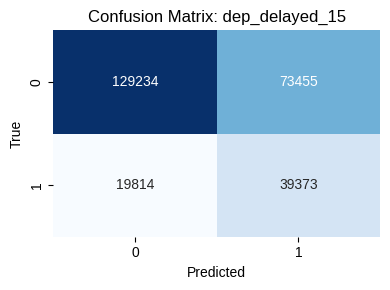

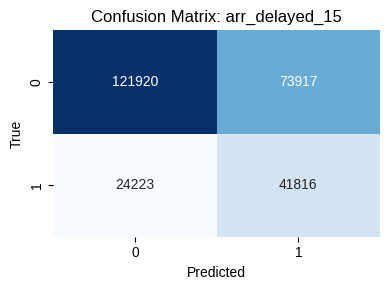

In [126]:
# Confuion matrix
plot_confusion_matrices(y_train, lr1_y_train_pred, label_names=["dep_delayed_15", "arr_delayed_15"])

In [127]:
# Evaluate Test error
lr1_test_mets, lr1_test_dets =  evaluate_multioutput_model(y_test,
                                                          lr1_y_test_pred,
                                                          lr1_y_test_proba,
                                                          label_names=["dep_delayed_15", "arr_delayed_15"])


==== Overall Metrics ====
Hamming Loss: 0.33
Subset Accuracy: 0.59
Average PR AUC: 0.37

==== Per-Label Metrics ====
         Label  Recall  Precision  F1 Score  PR AUC
dep_delayed_15    0.62       0.33      0.43    0.37
arr_delayed_15    0.61       0.34      0.44    0.37


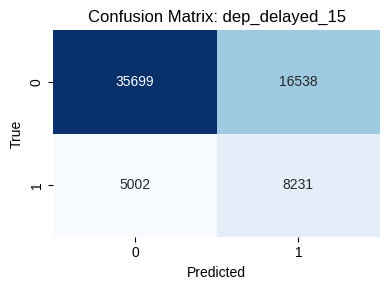

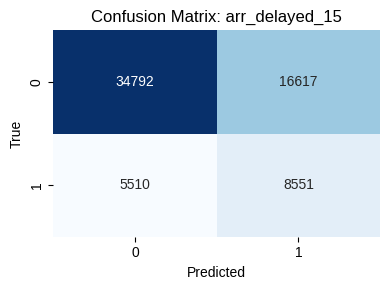

In [128]:
plot_confusion_matrices(y_test, lr1_y_test_pred, label_names=["dep_delayed_15", "arr_delayed_15"])

**Interpretation**

 ✅ **Overall Training Metrics**

1. **Hamming Loss: 0.30**

   * On average, 30% of the labels are incorrectly predicted per sample. This includes both missed true labels and incorrectly predicted labels. A lower Hamming Loss indicates better performance.

2. **Subset Accuracy: 0.59**

   * The model made exactly correct predictions (all labels) for 59% of the training samples. Since this metric requires all labels for a sample to be correct, it's quite strict.

3. **Average PR AUC: 0.39**

   *  On average, the area under the Precision-Recall Curve across all labels is 0.39, suggesting moderate ability to distinguish relevant from irrelevant labels — room for improvement.


✅ **Per-Label Metrics**
* **Recall (0.62 and 0.53)**:

  * The model correctly identifies \~62% of actual delay cases. This reflects good sensitivity — the model rarely misses true delays, which aligns well with our goal to maximize recall.

* **Precision (0.33 and 0.39)**:

  * Only \~34–38% of predicted delays are actually true delays. This indicates a high number of false positives, meaning the model tends to over-predict delays.

* **F1 Score (0.43 and 0.45)**:

  * The scores suggest moderate overall performance, leaning more toward high recall than precision.

* **PR AUC (0.37 and 0.42)**:

  * These support the F1 interpretation: the model has some ability to identify positive cases but not very strong.

Given the current performance — especially the strong recall — the model serves as a good baseline for predicting delays. Further tuning can help improve recall even more while managing precision.



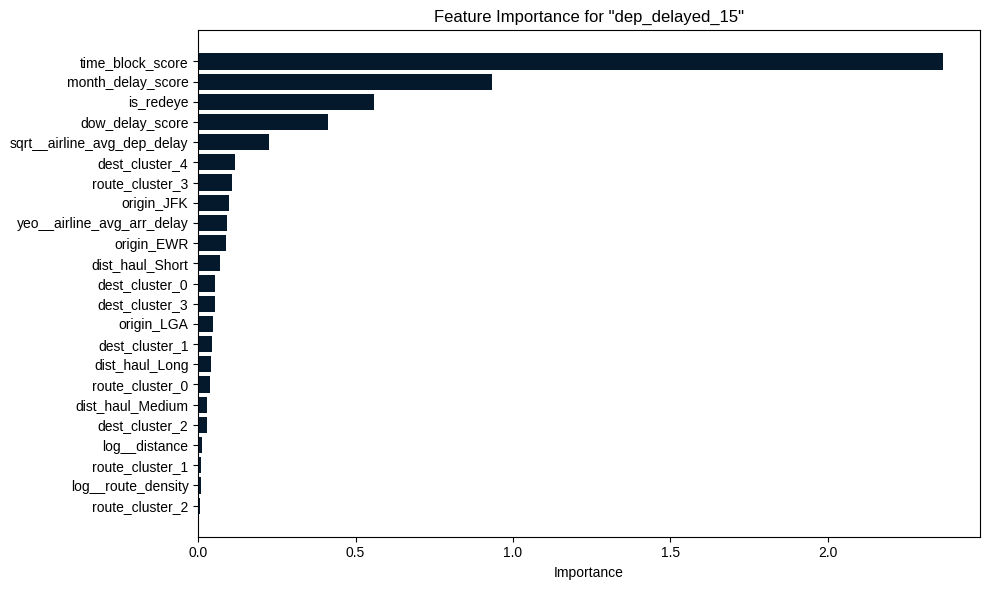

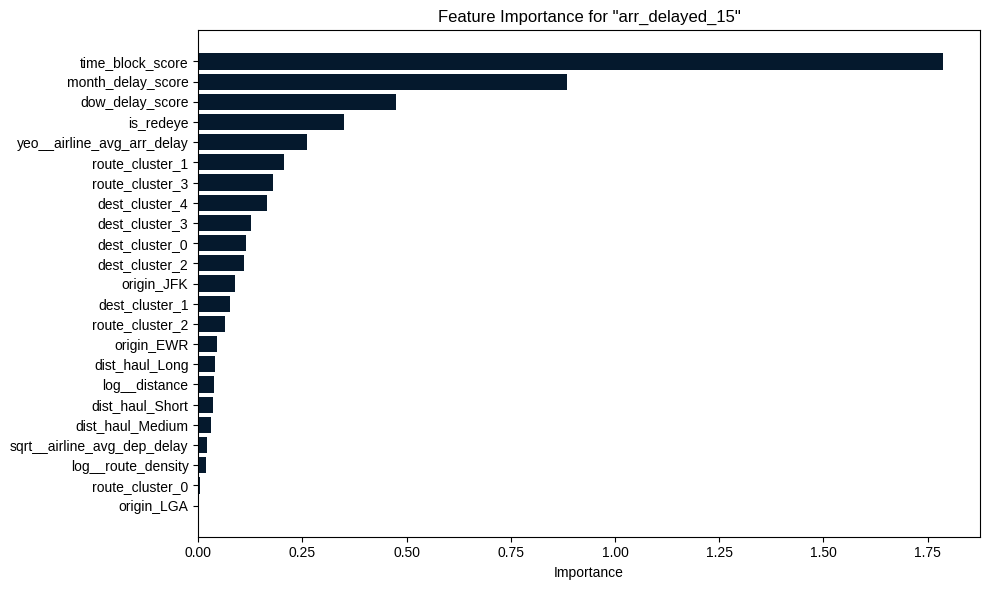

In [129]:
plot_feature_importance(lr_1, X_train_linear_df.columns,
                        label_names=["dep_delayed_15", "arr_delayed_15"])

In [130]:
plot_feature_importance(lr_1, X_train_linear_df.columns,
                        label_names=["dep_delayed_15", "arr_delayed_15"], plot=False)

{'dep_delayed_15':                         Feature  Importance
 6              time_block_score    2.365139
 4             month_delay_score    0.933253
 22                    is_redeye    0.557734
 5               dow_delay_score    0.412584
 3   sqrt__airline_avg_dep_delay    0.224090
 17               dest_cluster_4    0.117939
 21              route_cluster_3    0.108526
 8                    origin_JFK    0.098159
 0    yeo__airline_avg_arr_delay    0.092941
 7                    origin_EWR    0.089144
 12              dist_haul_Short    0.069820
 13               dest_cluster_0    0.052544
 16               dest_cluster_3    0.052168
 9                    origin_LGA    0.048379
 14               dest_cluster_1    0.042422
 10               dist_haul_Long    0.041310
 18              route_cluster_0    0.038430
 11             dist_haul_Medium    0.028884
 15               dest_cluster_2    0.028199
 1                 log__distance    0.010743
 19              route_cluster_1    0

**Feature Importance Interpretation**

🛫 `dep_delayed_15` – Departure Delay

| Rank  | Feature                                  | Importance  | Interpretation                                                                                                     |
| ----- | ---------------------------------------- | ----------- | ------------------------------------------------------------------------------------------------------------------ |
| 1     | `time_block_score`                       | 2.39        | Time-of-day has the strongest influence on whether a flight departs late. Likely reflects peak congestion periods. |
| 2     | `month_delay_score`                      | 1.02        | Certain months are more delay-prone — possibly due to weather (e.g., winter) or holiday traffic.                   |
| 3     | `is_redeye`                              | 0.59        | Redeye flights (overnight) slightly increase delay likelihood.                                                     |
| 4     | `dow_delay_score`                        | 0.47        | Day-of-week affects delay patterns — maybe weekends or Mondays are riskier.                                        |
| 5-8   | `origin_JFK`, `origin_LGA`, `origin_EWR` | \~0.24–0.39 | NYC-area airports contribute to delay risk, showing that departure airport matters.                                |
| 9-11  | `dist_haul_*`                            | \~0.28–0.37 | Short and medium haul flights are slightly more delay-prone, possibly due to tighter turnaround times.             |
| 12-17 | `dest_cluster_*`                         | \~0.21–0.27 | Some destination clusters correlate with delay — might be weather-prone or high-traffic airports.                  |
| 18-21 | `route_cluster_*`                        | \~0.17–0.34 | Route-specific trends play a moderate role — some routes are just more delay-prone.                                |
| 22    | `airline_avg_dep_delay`                  | 0.20        | The airline’s historical departure performance still helps, but is less important than time/location.              |
| 23-24 | Distance, density                        | \~0.01–0.05 | Travel distance and route density have minimal direct influence.                                                   |


🛬 `arr_delayed_15` – Arrival Delay

| Rank  | Feature                                     | Importance  | Interpretation                                                                                                                                            |
| ----- | ------------------------------------------- | ----------- | --------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1-2   | `log__air_time`, `log__distance`            | \~2.6–2.8   | Flight duration and distance are key for arrival delays. Long flights have more exposure to mid-flight disruptions.                                       |
| 3-4   | `time_block_score`, `month_delay_score`     | \~1.1–1.9   | Time-of-day and seasonal patterns still influence arrival times significantly.                                                                            |
| 5-6   | `dist_haul_Long`, `dow_delay_score`         | \~0.55–0.60 | Longer haul flights and day-of-week patterns matter too.                                                                                                  |
| 7-10  | Route and origin-related features           | \~0.35–0.45 | Route cluster, NYC origin airports, and certain destination clusters drive arrival risk.                                                                  |
| 11    | `airline_avg_arr_delay`                     | 0.31        | Historical airline performance contributes meaningfully to arrival delay predictions.                                                                     |
| 12-20 | Destinations and route clusters             | \~0.14–0.35 | Airport-level patterns (e.g., cluster delays) are consistent contributors.                                                                                |
| 21-24 | `dist_haul_Short`, route density, dep delay | Very low    | Minimal impact on arrival delays, especially the departure delay score, which is almost irrelevant for arrival delay predictions (importance: 0.001). |


**Common Important Drivers for Both**

* `time_block_score` and `month_delay_score`: Timing matters for both types of delays.
* `dow_delay_score`: Weekday patterns affect both departure and arrival delays.
* Origin airports (`JFK`, `EWR`, `LGA`) are important for both, likely due to congestion.

**Unique to Departure Delays**

* `is_redeye`: More relevant for departure, possibly due to overnight scheduling constraints.
* `origin` and `route_cluster` features dominate.
* Historical departure delays of airlines matter more than for arrivals.

**Unique to Arrival Delays**

* Flight duration and distance dominate.
* Airline's average arrival delay is more useful here than their departure history.
* Longer haul flights are more sensitive to in-flight or destination-side issues.


In [131]:
# Logging lr_1 test performance
log_model_performance("Logistic Regression (Baseline)",
                      lr1_test_mets,
                      lr1_test_dets,
                      notes="Above average recall, serves as good baseline")

## Random Forest

In [132]:
# RF setup
rf_base = RandomForestClassifier(random_state=42, class_weight='balanced')
rf = MultiOutputClassifier(rf_base)

In [133]:
# Train rf model on the tree based dataset
rf_1 = rf.fit(X_train_tree, y_train)

In [134]:
# Predictions
rf1_y_train_pred = rf_1.predict(X_train_tree)
rf1_y_test_pred = rf_1.predict(X_test_tree)

rf1_y_train_proba = get_multioutput_proba(rf_1, X_train_tree)
rf1_y_test_proba = get_multioutput_proba(rf_1, X_test_tree)

In [135]:
# Evaluate training error
rf1_train_mets, rf1_train_dets =  evaluate_training_performance(rf_1,
                                                                X_train_tree,
                                                                y_train,
                                                                label_names=["dep_delayed_15",
                                                                             "arr_delayed_15"])

==== Training Metrics ====
Hamming Loss: 0.22
Subset Accuracy: 0.69
Average PR AUC: 0.65

==== Per-Label Training Metrics ====
         Label  Recall  Precision  F1 Score  PR AUC
dep_delayed_15    0.70       0.53      0.60    0.65
arr_delayed_15    0.69       0.54      0.61    0.66


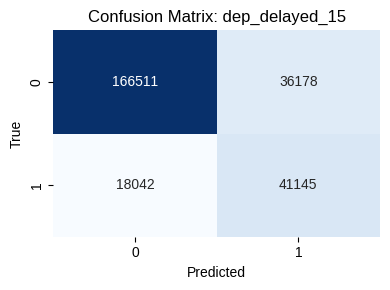

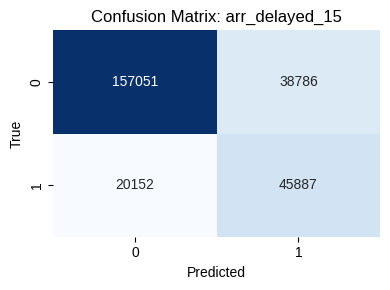

In [136]:
plot_confusion_matrices(y_train, rf1_y_train_pred,
                        label_names=["dep_delayed_15", "arr_delayed_15"])

In [137]:
# Evaluate test error
rf1_test_mets, rf1_test_dets =  evaluate_multioutput_model(y_test,
                                                          rf1_y_test_pred,
                                                          rf1_y_test_proba,
                                                          label_names=["dep_delayed_15",
                                                                       "arr_delayed_15"])

==== Overall Metrics ====
Hamming Loss: 0.30
Subset Accuracy: 0.60
Average PR AUC: 0.32

==== Per-Label Metrics ====
         Label  Recall  Precision  F1 Score  PR AUC
dep_delayed_15    0.43       0.33      0.38    0.32
arr_delayed_15    0.41       0.34      0.37    0.31


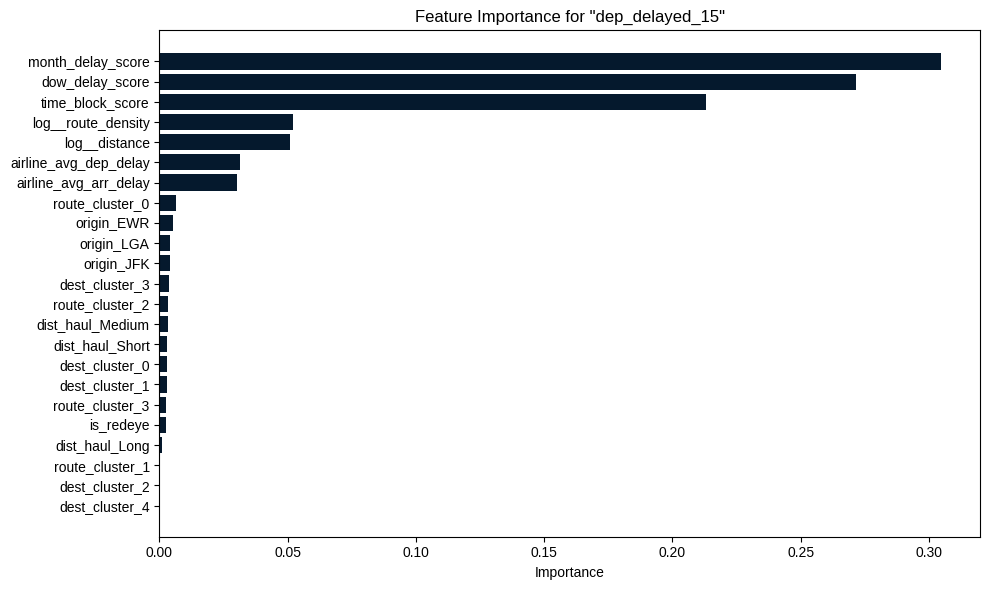

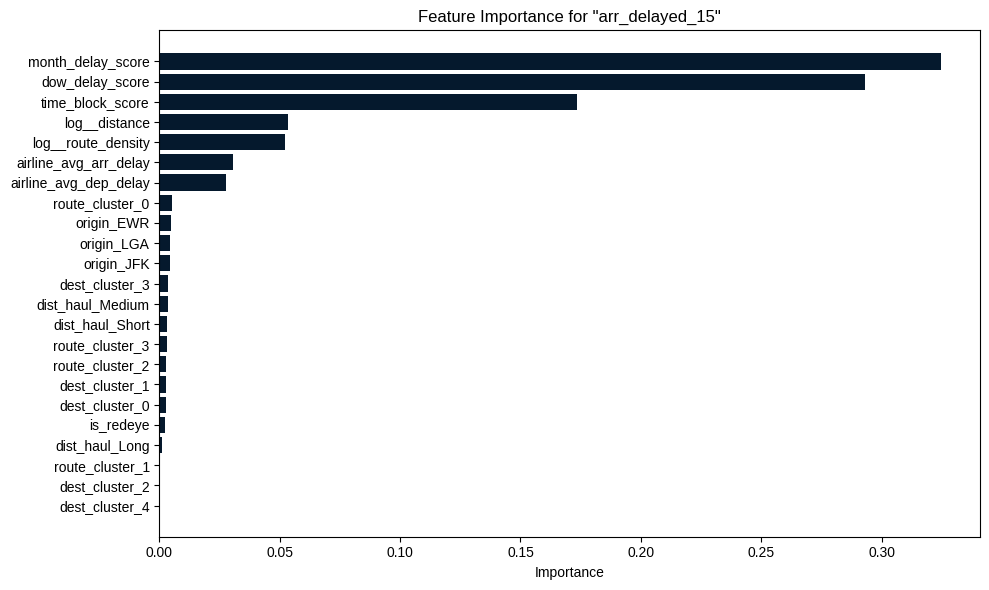

In [138]:
plot_feature_importance(rf_1, X_train_tree_df.columns,
                        label_names=["dep_delayed_15", "arr_delayed_15"])

**Interpretation**

From the results of both random forests models we can tell that the model is overfitting. It performs exepctionally well on the train set but generalizes poorly to the test set and that is a big red flag.

To address this the hyperparameters will be tuned in subsequent training.

In [139]:
# Log performance
log_model_performance("Random Forest (Baseline)",
                      rf1_test_mets,
                      rf1_test_dets,
                      notes="Performance is very poor due to overfitting")

## Tuning RF


```
param_dist = {
    'estimator__n_estimators': [100, 110, 120],
    'estimator__max_depth': [15, 17],
    'estimator__min_samples_split': [2, 3, 4],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__max_features': ['sqrt', 'log2'],
    'estimator__bootstrap': [True, False]
}


# Setup GridSearchCV
random_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_dist,
    scoring=scorer,
    cv=3,
    verbose=2,
    n_jobs=2,
)


# Fit to tree data
random_search_rf.fit(X_train_tree_small, y_train_small)

# Best estimators
print("Best Estimator:", random_search_rf.best_estimator_)


rf_tuned_params = random_search_rf.best_params_
rf_tuned_params_cleaned = {k.replace("estimator__", ""): v for k, v in rf_tuned_params.items()}
rf_tuned_params_cleaned

```



In [140]:
# Split a smaller portion for quicker tuning
# Combine features and targets temporarily
combined = pd.concat([X_train_tree_df, y_train], axis=1)

# Filter both labels' positive and negative cases
dep_1 = combined[combined['dep_delayed_15'] == 1]
dep_0 = combined[combined['dep_delayed_15'] == 0].sample(len(dep_1), random_state=42)

arr_1 = combined[combined['arr_delayed_15'] == 1]
arr_0 = combined[combined['arr_delayed_15'] == 0].sample(len(arr_1), random_state=42)

# Combine all balanced samples
balanced_combined = pd.concat([dep_1, dep_0, arr_1, arr_0]).drop_duplicates()

# Randomly sample 10,000 rows for tuning
sampled = balanced_combined.sample(n=10000, random_state=42)

# Split into X and y
X_train_tree_small = sampled.drop(['dep_delayed_15', 'arr_delayed_15'], axis=1)
y_train_small = sampled[['dep_delayed_15', 'arr_delayed_15']]

In [141]:
# Custom scoring function to average PR AUC across all labels
def multilabel_avg_precision_fixed(y_true, y_pred_proba):
    scores = []
    for i in range(len(y_pred_proba)):
        class_1_probs = y_pred_proba[i][:, 1]  # Prob for class 1
        y_true_label = y_true[:, i]
        # Check if y_true_label has both classes (0 and 1)
        if len(np.unique(y_true_label)) < 2:
            # Can't compute average_precision_score if only one class present
            scores.append(0)
            continue
        try:
            score = average_precision_score(y_true_label, class_1_probs)
            if np.isnan(score):
                score = 0
        except Exception:
            score = 0
        scores.append(score)
    return np.mean(scores)

scorer = make_scorer(multilabel_avg_precision_fixed, needs_proba=True)

In [142]:
rf_params = {
 'bootstrap': True,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100
}

In [143]:
# Create model using the tuned parameters
rf_tuned = MultiOutputClassifier(RandomForestClassifier(random_state=42,
                                                        class_weight='balanced',
                                                        **rf_params))

In [144]:
# Fit on training set
rf_2 = rf_tuned.fit(X_train_tree, y_train)

In [145]:
# Evaluate training performance
rf2_train_mets, rf2_train_dets =  evaluate_training_performance(rf_2,
                                                                X_train_tree,
                                                                y_train,
                                                                label_names=["dep_delayed_15",
                                                                             "arr_delayed_15"])

==== Training Metrics ====
Hamming Loss: 0.28
Subset Accuracy: 0.63
Average PR AUC: 0.55

==== Per-Label Training Metrics ====
         Label  Recall  Precision  F1 Score  PR AUC
dep_delayed_15    0.72       0.43      0.54    0.54
arr_delayed_15    0.69       0.46      0.55    0.55


In [146]:
# Predictions
rf2_y_train_pred = rf_2.predict(X_train_tree)
rf2_y_test_pred = rf_2.predict(X_test_tree)

rf2_y_train_proba = get_multioutput_proba(rf_2, X_train_tree)
rf2_y_test_proba = get_multioutput_proba(rf_2, X_test_tree)

In [147]:
# Evaluate test performance
rf2_test_mets, rf2_test_dets =  evaluate_multioutput_model(y_test,
                                                          rf2_y_test_pred,
                                                          rf2_y_test_proba,
                                                          label_names=["dep_delayed_15",
                                                                       "arr_delayed_15"])

==== Overall Metrics ====
Hamming Loss: 0.30
Subset Accuracy: 0.60
Average PR AUC: 0.37

==== Per-Label Metrics ====
         Label  Recall  Precision  F1 Score  PR AUC
dep_delayed_15    0.58       0.35      0.43    0.37
arr_delayed_15    0.51       0.36      0.42    0.37


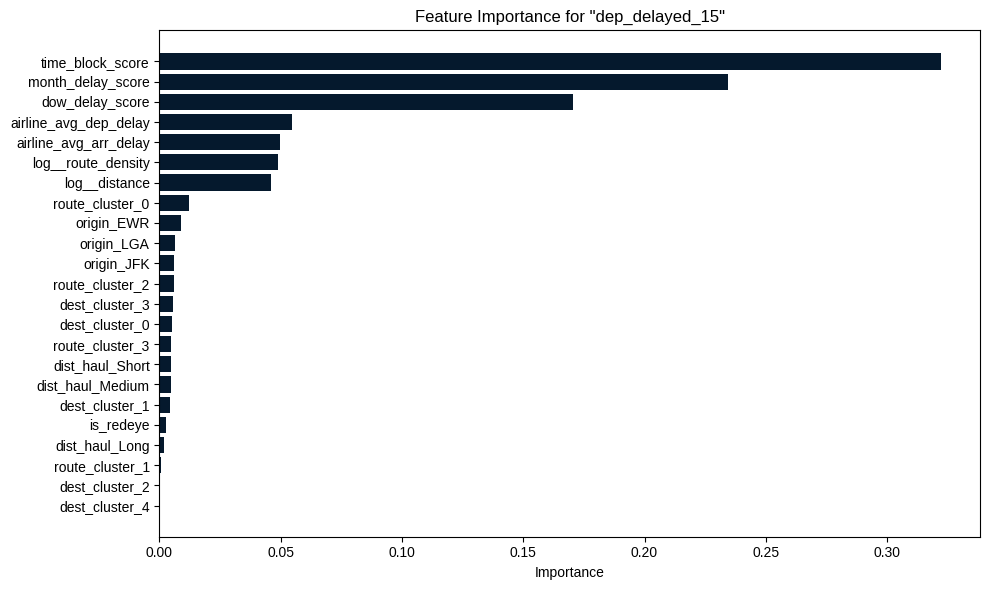

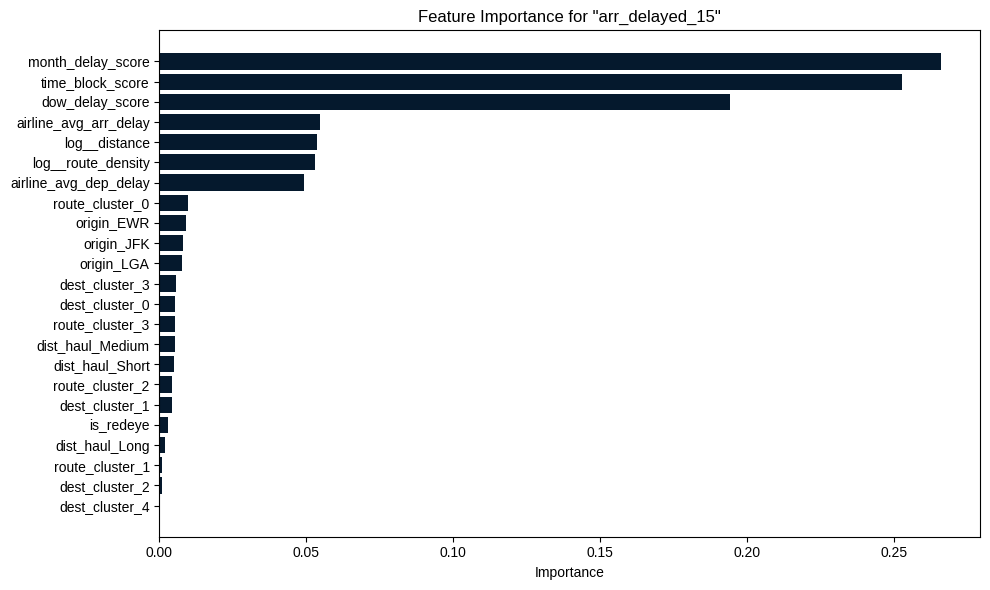

In [148]:
# plot feature importance
plot_feature_importance(rf_2, X_train_tree_df.columns,
                        label_names=["dep_delayed_15", "arr_delayed_15"])

## Tuning Logreg

```
# parameters
param_dist = {
    'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'estimator__penalty': ['l1', 'l2']
}


# Create small linear set
combined_linear = pd.concat([X_train_linear_df, y_train], axis=1)

# Filter both labels' positive and negative cases
dep_1 = combined_linear[combined_linear['dep_delayed_15'] == 1]
dep_0 = combined_linear[combined_linear['dep_delayed_15'] == 0].sample(len(dep_1),
                                                                       random_state=42)

arr_1 = combined_linear[combined_linear['arr_delayed_15'] == 1]
arr_0 = combined_linear[combined_linear['arr_delayed_15'] == 0].sample(len(arr_1),
                                                                       random_state=42)

# Combine all balanced samples
balanced_combined = pd.concat([dep_1, dep_0, arr_1, arr_0]).drop_duplicates()

# Randomly sample 10,000 rows for tuning
sampled = balanced_combined.sample(n=10000, random_state=42)

# Split into X and y
X_train_linear_small = sampled.drop(['dep_delayed_15', 'arr_delayed_15'], axis=1)
y_train_small = sampled[['dep_delayed_15', 'arr_delayed_15']]


# Setup Gridsearchcv
logreg_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_dist,
    scoring=scorer,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit to data
logreg_search.fit(X_train_linear_small, y_train_small)


logreg_tuned_params = logreg_search.best_params_
logreg_tuned_params_cleaned = {k.replace("estimator__", ""): v for k, v in logreg_tuned_params.items()}
logreg_tuned_params_cleaned

```



In [149]:
logreg_params = {'C': 0.001, 'penalty': 'l1'}

In [150]:
# Create model
logreg_tuned = MultiOutputClassifier(LogisticRegression(solver='saga',
                                                        random_state=42,
                                                        max_iter=1000,
                                                        class_weight='balanced',
                                                        **logreg_params))

In [151]:
# Fit on train data
lr_2 = logreg_tuned.fit(X_train_linear_df, y_train)

In [152]:
# Evalute train error
lr2_train_mets, lr2_train_dets = evaluate_training_performance(lr_2,
                                                               X_train_linear_df,
                                                               y_train,
                                                               label_names=['dep_delayed_15',
                                                                            'arr_delayed_15'])

==== Training Metrics ====
Hamming Loss: 0.37
Subset Accuracy: 0.55
Average PR AUC: 0.39

==== Per-Label Training Metrics ====
         Label  Recall  Precision  F1 Score  PR AUC
dep_delayed_15    0.66       0.35      0.46    0.39
arr_delayed_15    0.63       0.36      0.46    0.40


In [153]:
# Predictions
lr2_y_train_pred = lr_2.predict(X_train_linear_df)
lr2_y_test_pred = lr_2.predict(X_test_linear_df)

lr2_y_train_proba = get_multioutput_proba(lr_2, X_train_linear_df)
lr2_y_test_proba = get_multioutput_proba(lr_2, X_test_linear_df)

In [154]:
# Evaluate test error
lr2_test_mets, lr2_test_dets = evaluate_multioutput_model(y_test,
                                                          lr2_y_test_pred,
                                                          lr2_y_test_proba,
                                                          label_names=["dep_delayed_15",
                                                                       "arr_delayed_15"])

==== Overall Metrics ====
Hamming Loss: 0.34
Subset Accuracy: 0.59
Average PR AUC: 0.36

==== Per-Label Metrics ====
         Label  Recall  Precision  F1 Score  PR AUC
dep_delayed_15    0.62       0.33      0.43    0.36
arr_delayed_15    0.61       0.34      0.43    0.37


## Oversampling the Minority

## Performance Log

In [155]:
# Get the final table
models_log = get_performance_log_df()
models_log

,Model,dep_delayed_15 Recall,dep_delayed_15 Precision,dep_delayed_15 F1 Score,dep_delayed_15 PR AUC,arr_delayed_15 Recall,arr_delayed_15 Precision,arr_delayed_15 F1 Score,arr_delayed_15 PR AUC,Hamming Loss,Subset Accuracy,Average PR AUC,Notes
0,Logistic Regression (Baseline),0.62,0.33,0.43,0.37,0.61,0.34,0.44,0.37,0.33,0.59,0.37,"Above average recall, serves as good baseline"
1,Random Forest (Baseline),0.43,0.33,0.38,0.32,0.41,0.34,0.37,0.31,0.30,0.60,0.32,Performance is very poor due to overfitting
